# Lesson on multivariate data visualization
After knowing the possible values of our variables, and their distribution, we can move forward to correlated  point 2: **check how our variables are correlated**

## When looking into a dataset, we have different tasks in terms of visualizations:   
1. understand the set of possible values for each variable and identify typical distributions   
  - which values are more common,   
  - check for outliers, missing data,   
  - etc..  
2. **check how variables are correlated**
  - **how distributions change when we fix a subset of variables,**  
  - **pairwise correlations,** 
  - how values evolve overtime (if one variable is time!), 
  - etc..   
3. support your business analysis and convey relevant messages in a compelling way!
  - show growth potential in a given market
  - show relations between markets.

## Again, the type of data is important:
- numerical vs numerical  
- numerical vs dates!  
- numerical vs geo!
- numerical vs categorical  
- categorical vs categorical  


# Summary
In this part of the lecture, in terms of **data visualization concepts** we will address:
1. how to rapidly extract insights based on the joint distribution of two or more variables, namely when at least one is categorical


In this lecture in terms of **programming skills** we will see how to:  
1. Represent mosaic plots for distributions of two categorical variables  
1. How to use stacked histograms    
1. Use box plots and histograms with error bars
1. Check how to represent discontinuities in axes
1. Use violin plots to directly compare distributions across two disjoint segments


In [3]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns

# You were given the task of finding the best city for your new restaurant

## The first think we want to look at is the relation between cities and the restaurants price tag
As we do not have access to actual menus and prices, we use the cost range tag that appears in zomato.  
Both the tag and the city are categorical variables.  
-- A good approach to represent two categorical variables is through a mosaic plot, where the area represents the relative size of the joint event in your dataset.   


### We load the data and focus on only a few main cities
Some data, namely the price range, needs some cleaning: we need to impute nas and nulls

In [8]:
#load dataframe
df = pd.read_csv("curated.csv")
#clean data by filling in na
df["Price Range"].fillna("na", inplace=True)
# add escape characters in $$$$ as it is raising some errors
price_range = df["Price Range"].unique()
df[df["Price Range"]==price_range[1]]="\\$\\$\\$\\$"
#focus on subset of cities
capital = ["Amsterdam", "Berlin", "Brussels","Lisbon","London","Luxemburg","Madrid","Paris","Prague","Rome","Vienna"]
df = df[df["City"].isin(capital)]

To showcase how two categorical variables, e.g. city vs price range, are related, we can use a mosaic plot.
A mosaic plot represent the dataset with rectangles and has a prefered direction associated with one of the variables.
- In the example below, we have cities and price ranges. 
- Cities are represented in the y axis and represent the "independent category" in the sense that: i) the total height represents always the same quantity - the number of samples in the dataset over all categories; ii) rectangle heigth represents the fraction of elements in that category
- The price range is represented in the x axis and is proportional to the fraction of restaurants in that city with the given price range

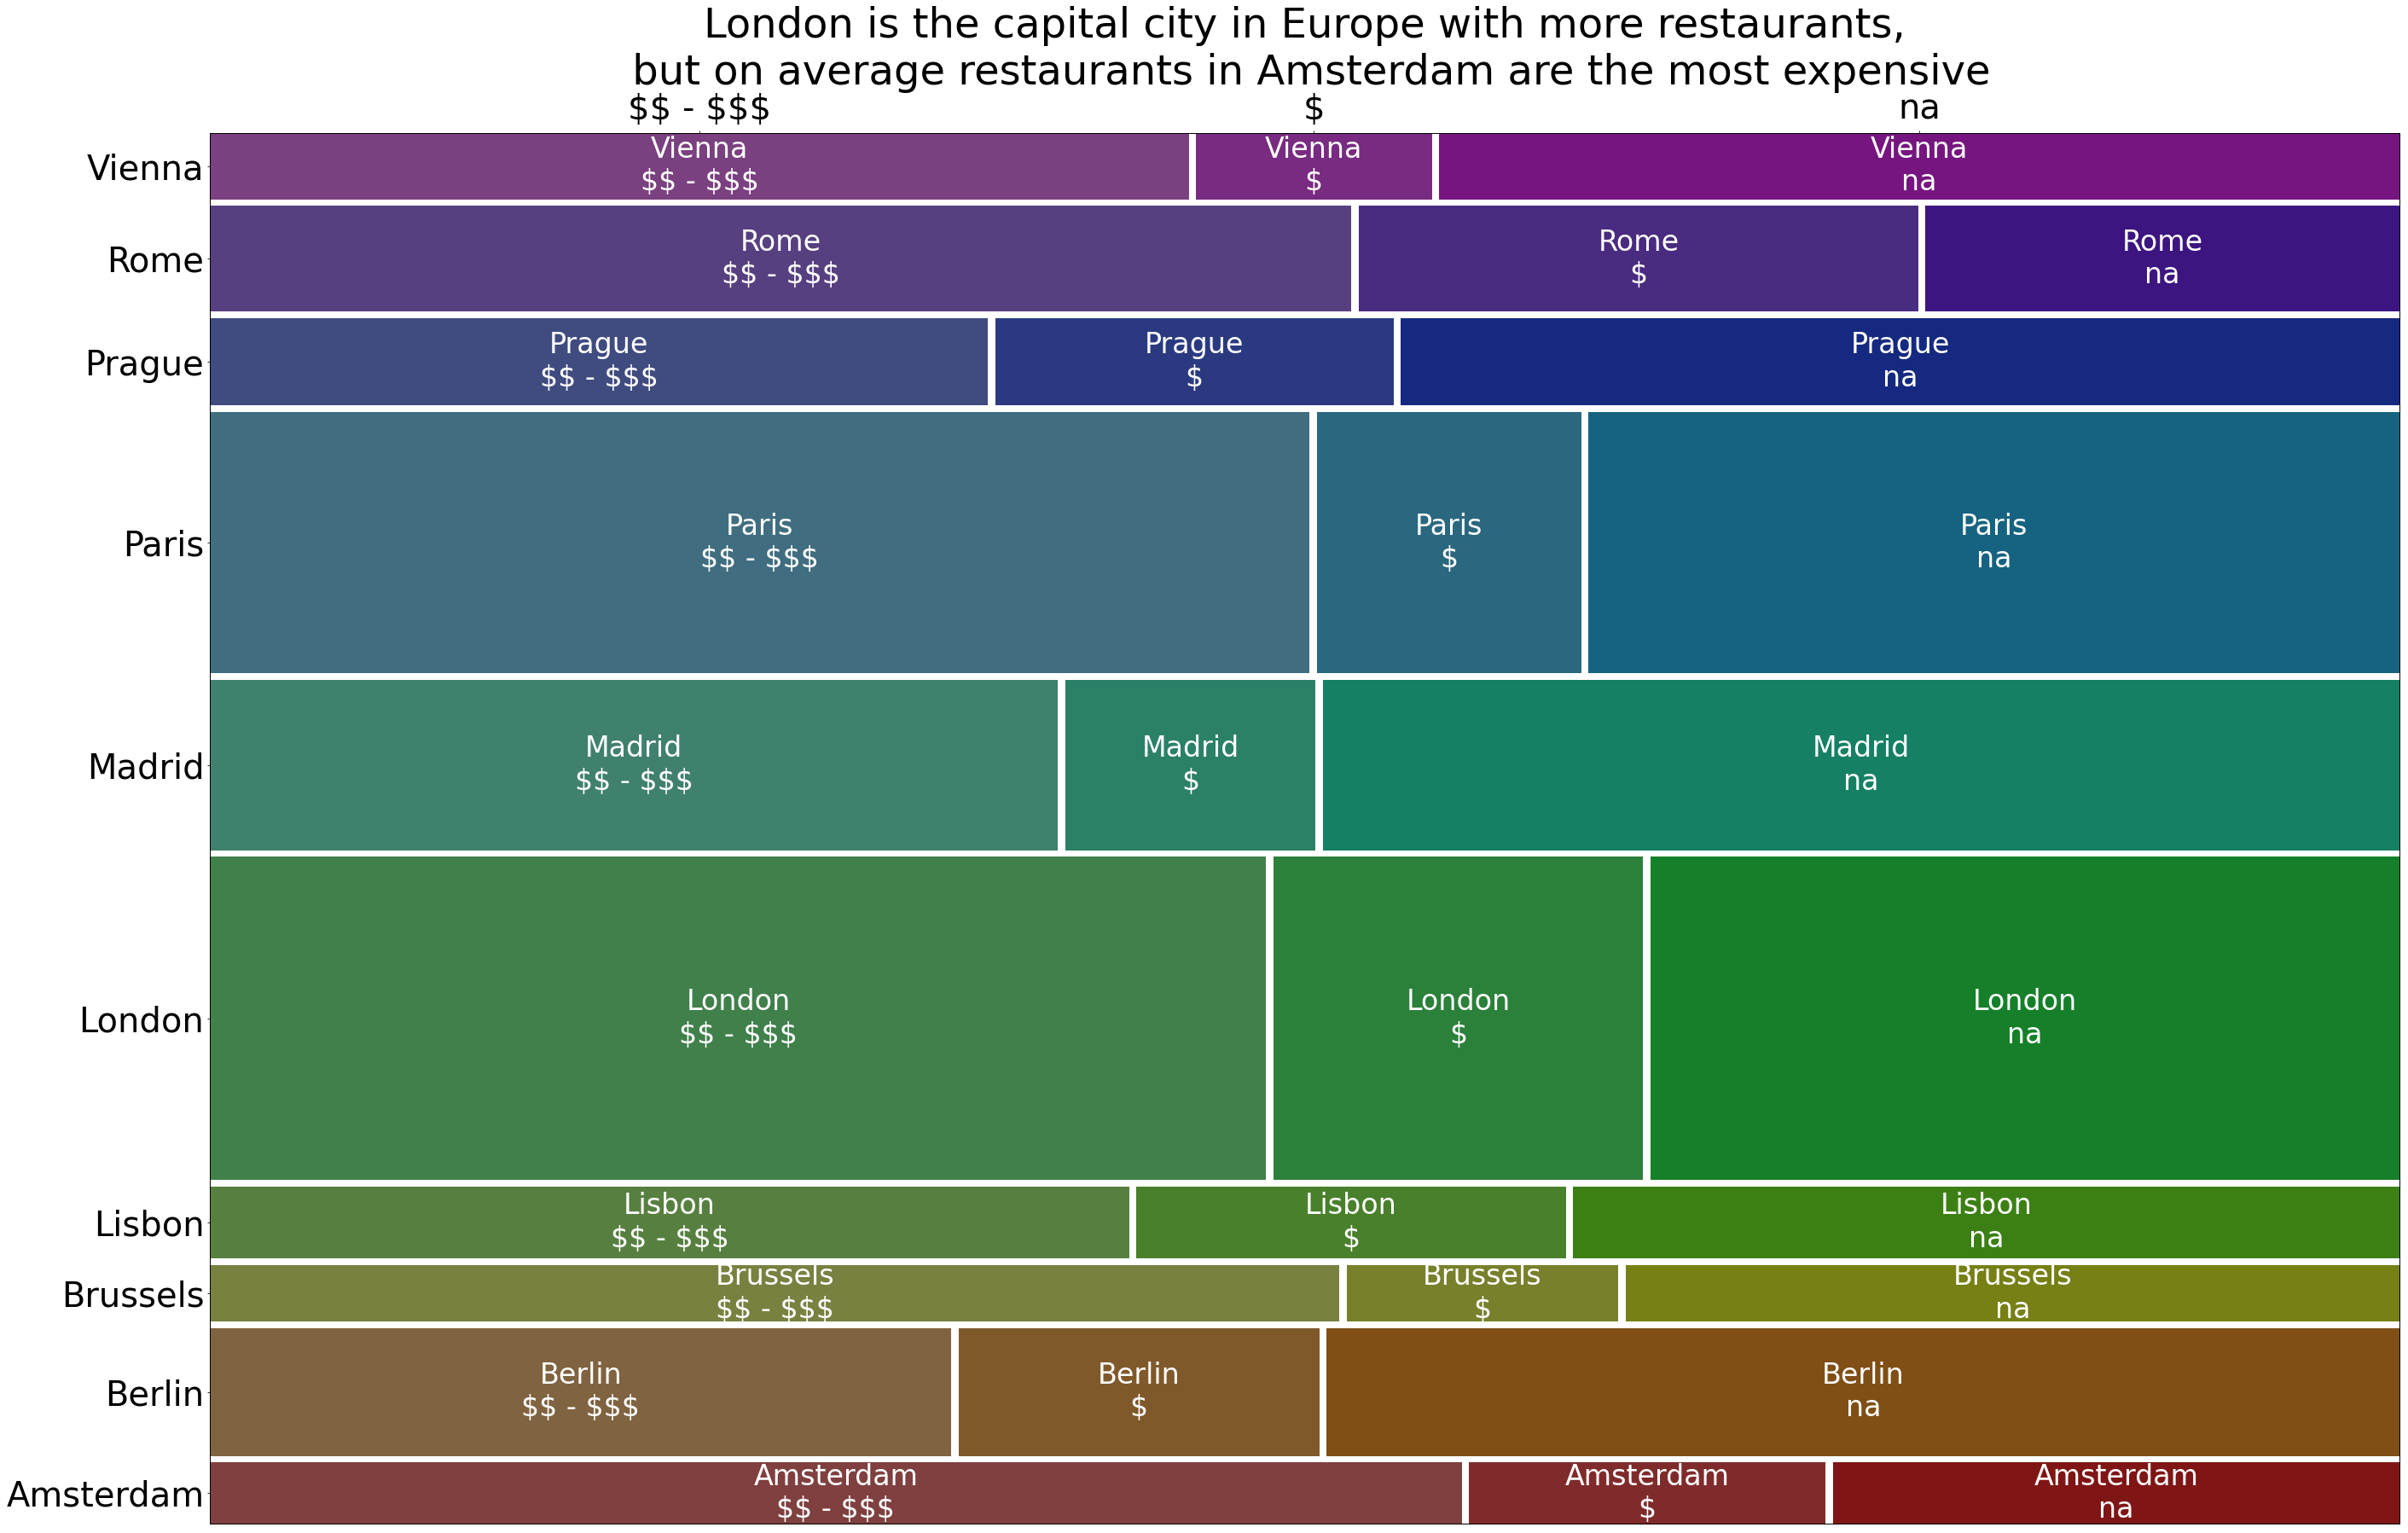

In [ ]:
# importing a mosaic library from stats models
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(46,30))
plt.rcParams["text.color"] = "w"
plt.rcParams["font.size"] = 40
mosaic(df, ['City', 'Price Range'], horizontal=False, ax=ax)
plt.title("London is the capital city in Europe with more restaurants,\n but on average restaurants in Amsterdam are the most expensive", {"color":"k"});

### Important things in this plot:
-- All variables are spatially encoded and it makes it easy to view any pairs of visual attributes independently  
-- It is easy do perform tasks such as find the largest and smaller objects (i.e., largest and smaller markets)  
-- Visual separable dimensions

### Notes on programming: pandas basics
-- Fill in missing values with fillna  
-- Get all the possible values you may find in a column using df["your_column"].unique()  
### Notes on programming: plots  
-- mosaic plots are in a statistics library - they do not offer many costumizations  
-- sometimes we have to use matplotlib primative directly: **plt.rcParams["text.color"]**  
-- increase contrast by using white test on top of solid colors  

### Try it yourself
-- Repeat the above example but instead of price range, use Rating (only the ones greater than 3)

In [ ]:
#We start by choosing just the subset of columns we are interested in and select the range of values that we want evaluate
df_rate = df[["City", "Rating"]].dropna()
df_rate["Rating"] = df_rate["Rating"].astype("float")
df_rate = df_rate[df_rate["Rating"] > 3]  
df_rate

,City,Rating
0,Amsterdam,5.0
6,Amsterdam,4.5
9,Amsterdam,4.5
10,Amsterdam,4.5
11,Amsterdam,4.5
...,...,...
121195,Vienna,5.0
121198,Vienna,3.5
121223,Vienna,4.0
121224,Vienna,4.0


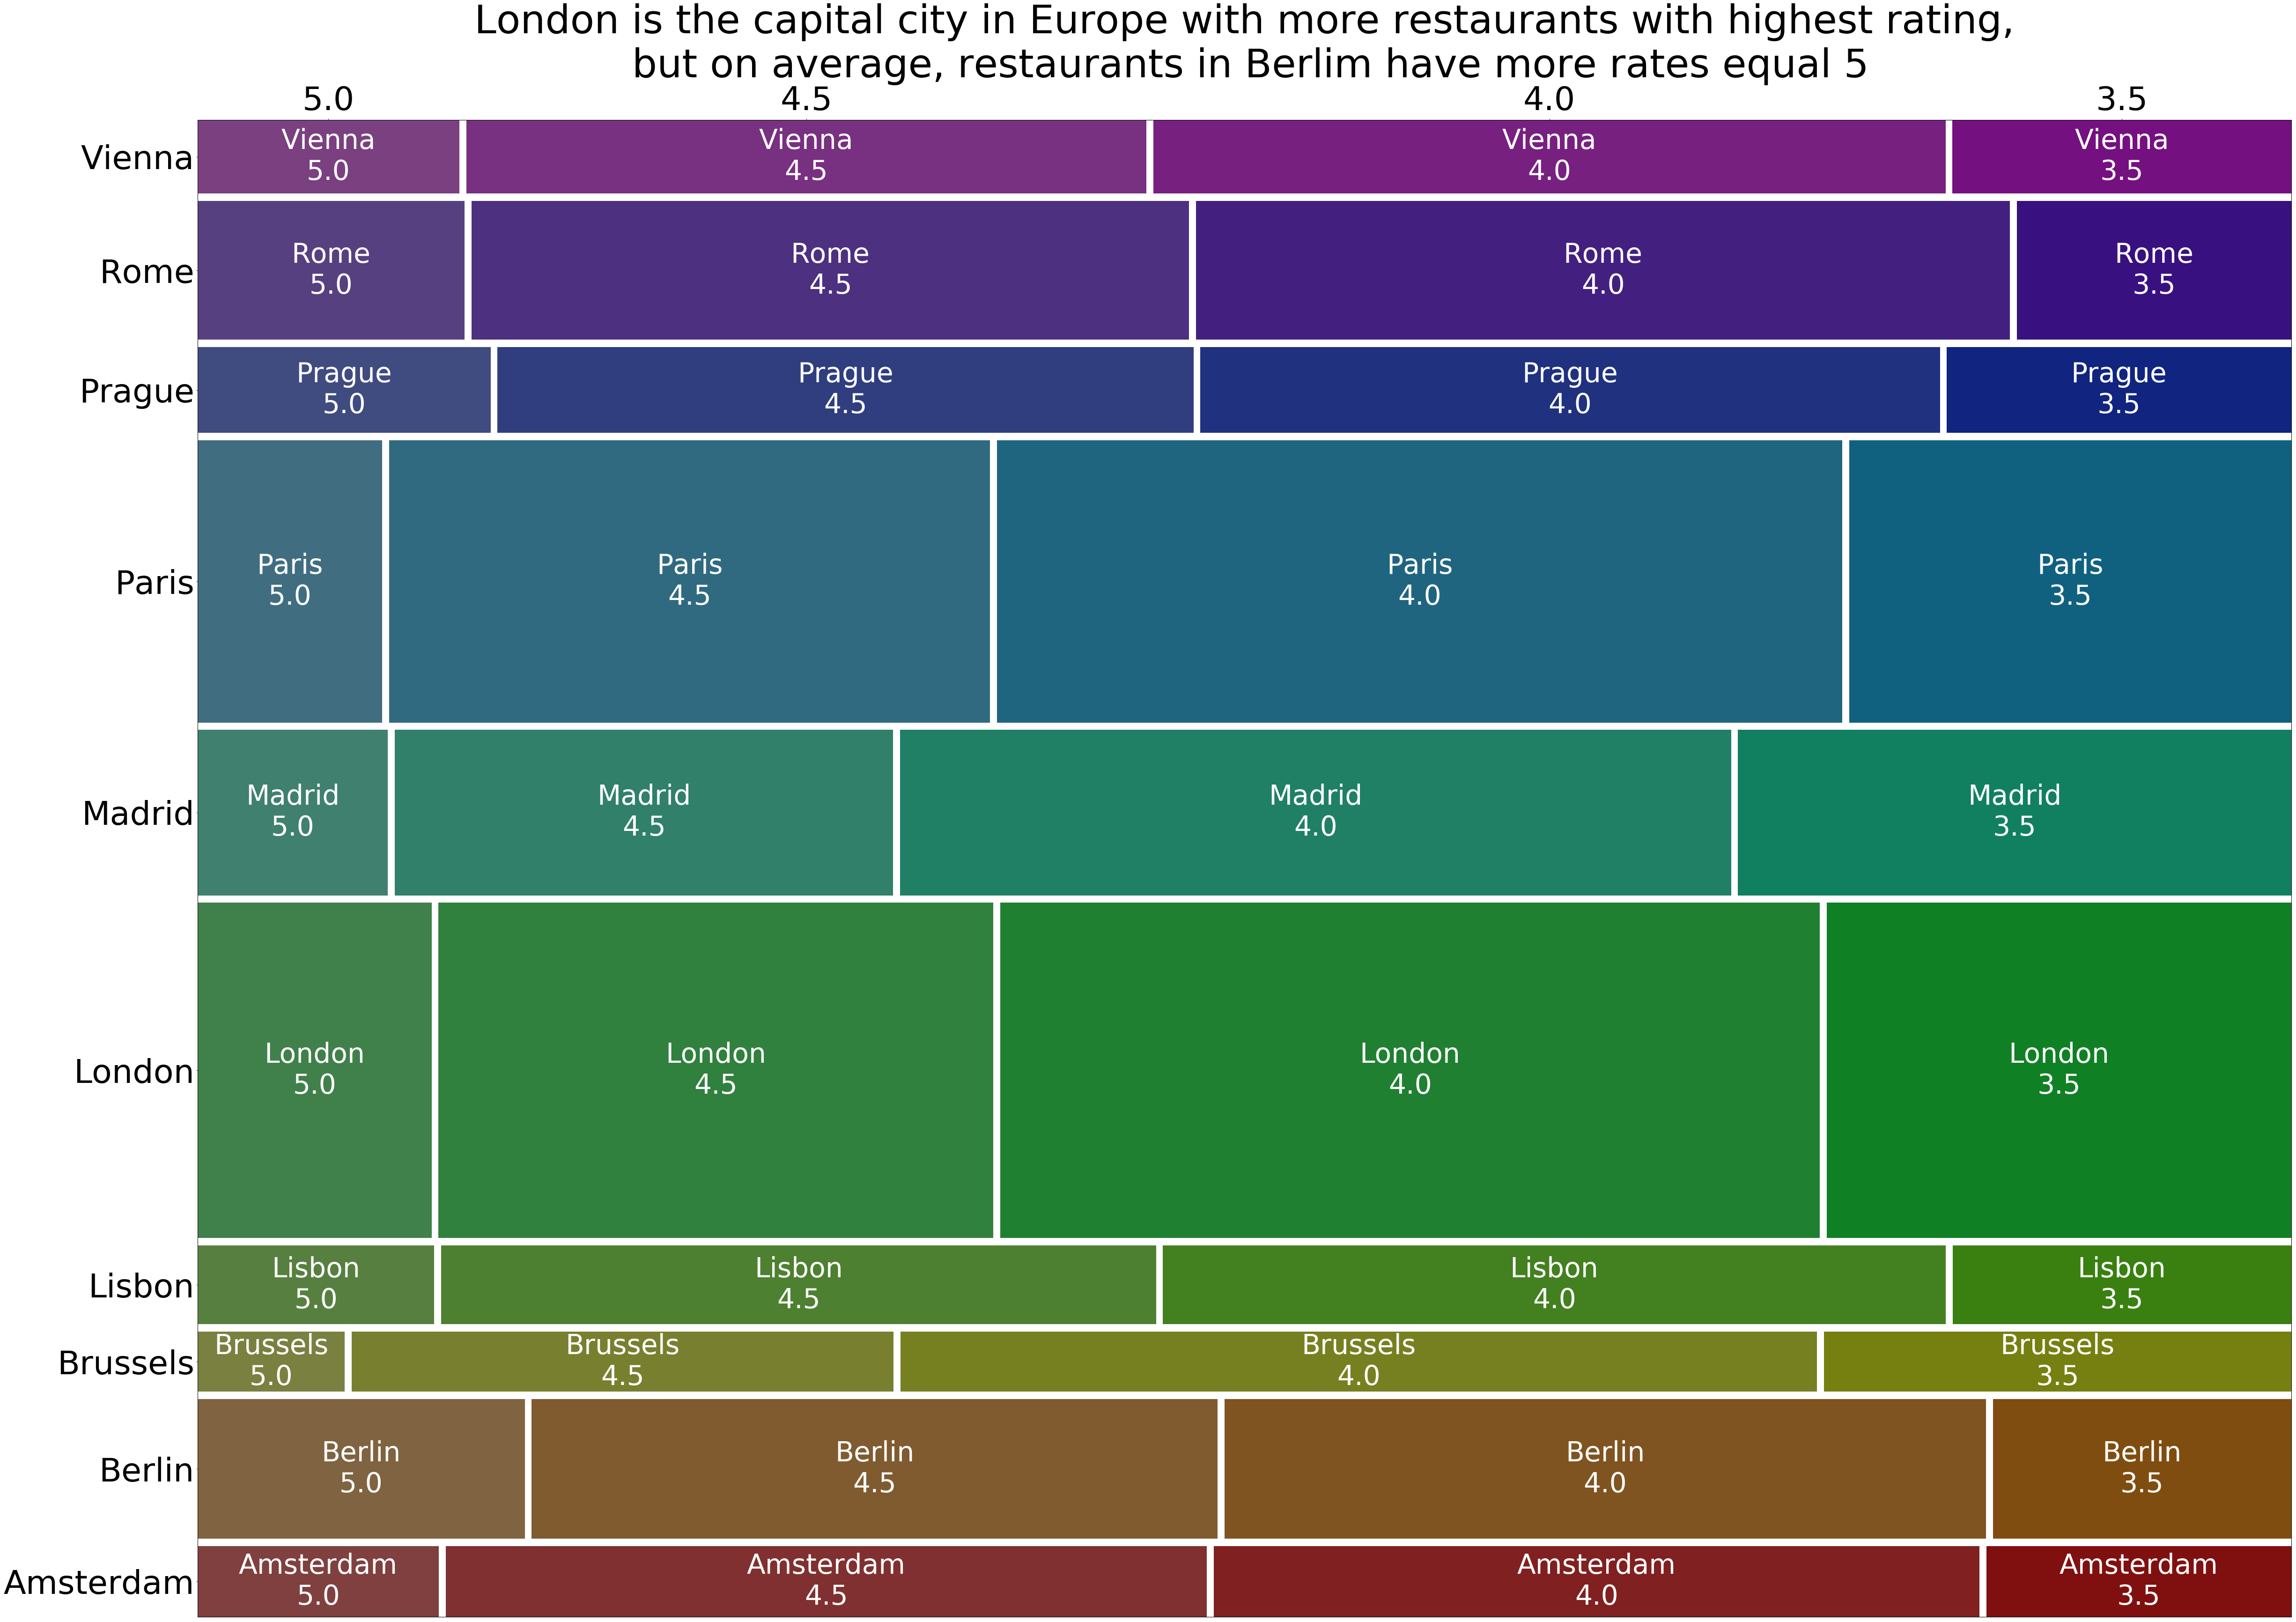

In [ ]:
#plot
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
fig1, ax1= plt.subplots(figsize=(70,50))
plt.rcParams["text.color"] = "w"
plt.rcParams["font.size"] = 70
mosaic(df_rate, ['City', 'Rating'], horizontal=False, ax=ax1)
plt.title("London is the capital city in Europe with more restaurants with highest rating,\n but on average, restaurants in Berlim have more rates equal 5", {"color":"k"});
fig1.set_tight_layout(True)

### We could have represented the same information using stacked histograms plots
-- we would first have to transform the dataset so that we would have a numerical feature associated with the number of restaurants in that city with a given price range

#### Stacked plots with pandas require a standard data structure:
-- The "independent variable" in the plot is the index => in our case we need to reset the index as the city  
-- The "dependent variable" is the column names => in our case we need to have new columns - one for each possible value of "Price Range"  
-- The dependent variable has to be numerical => we need to count the number of restaurants ourselves and add it as a column to the dataset  
Final structure:

 City   |  \$  |  \\$\\$-\\$\\$\\$ |  na  
--- | :---: | --- |---   
Amst.  |546  |   1915  |    867  
Prague | 871   |    1702   |    2185    
...      
  

#### Pandas refresh time:

In [ ]:
# counting elements in a subset of columns and add it as a columns
df_count = df[['City', 'Price Range']].groupby(["City", "Price Range"]).size().reset_index(name='counts')
# - groupby - Seperates all elements of the dataset that have the same pair of values for City and Price Range, e.g., 
#             one group would be $ restaurants in Prague
#             a second group would $$ - $$$ in Prague
#             another would be $$ - $$$ in Lisbon
# - size()  - computes the number of rows in each group -> it becomes an index!
# - reset_index(name='counts') - we promote the index to column and name it counts

In [ ]:
# setting City as index
df_count.set_index("City",inplace=True)

In [ ]:
# setting the values of "Price Range" as new columns and counts as the values in the table
df_count = df_count.pivot(columns="Price Range", values="counts")

In [ ]:
df_count.head(2)

Price Range,$,$$ - $$$,na
City,,,
Amsterdam,546,1915,867
Berlin,1153,2366,3425


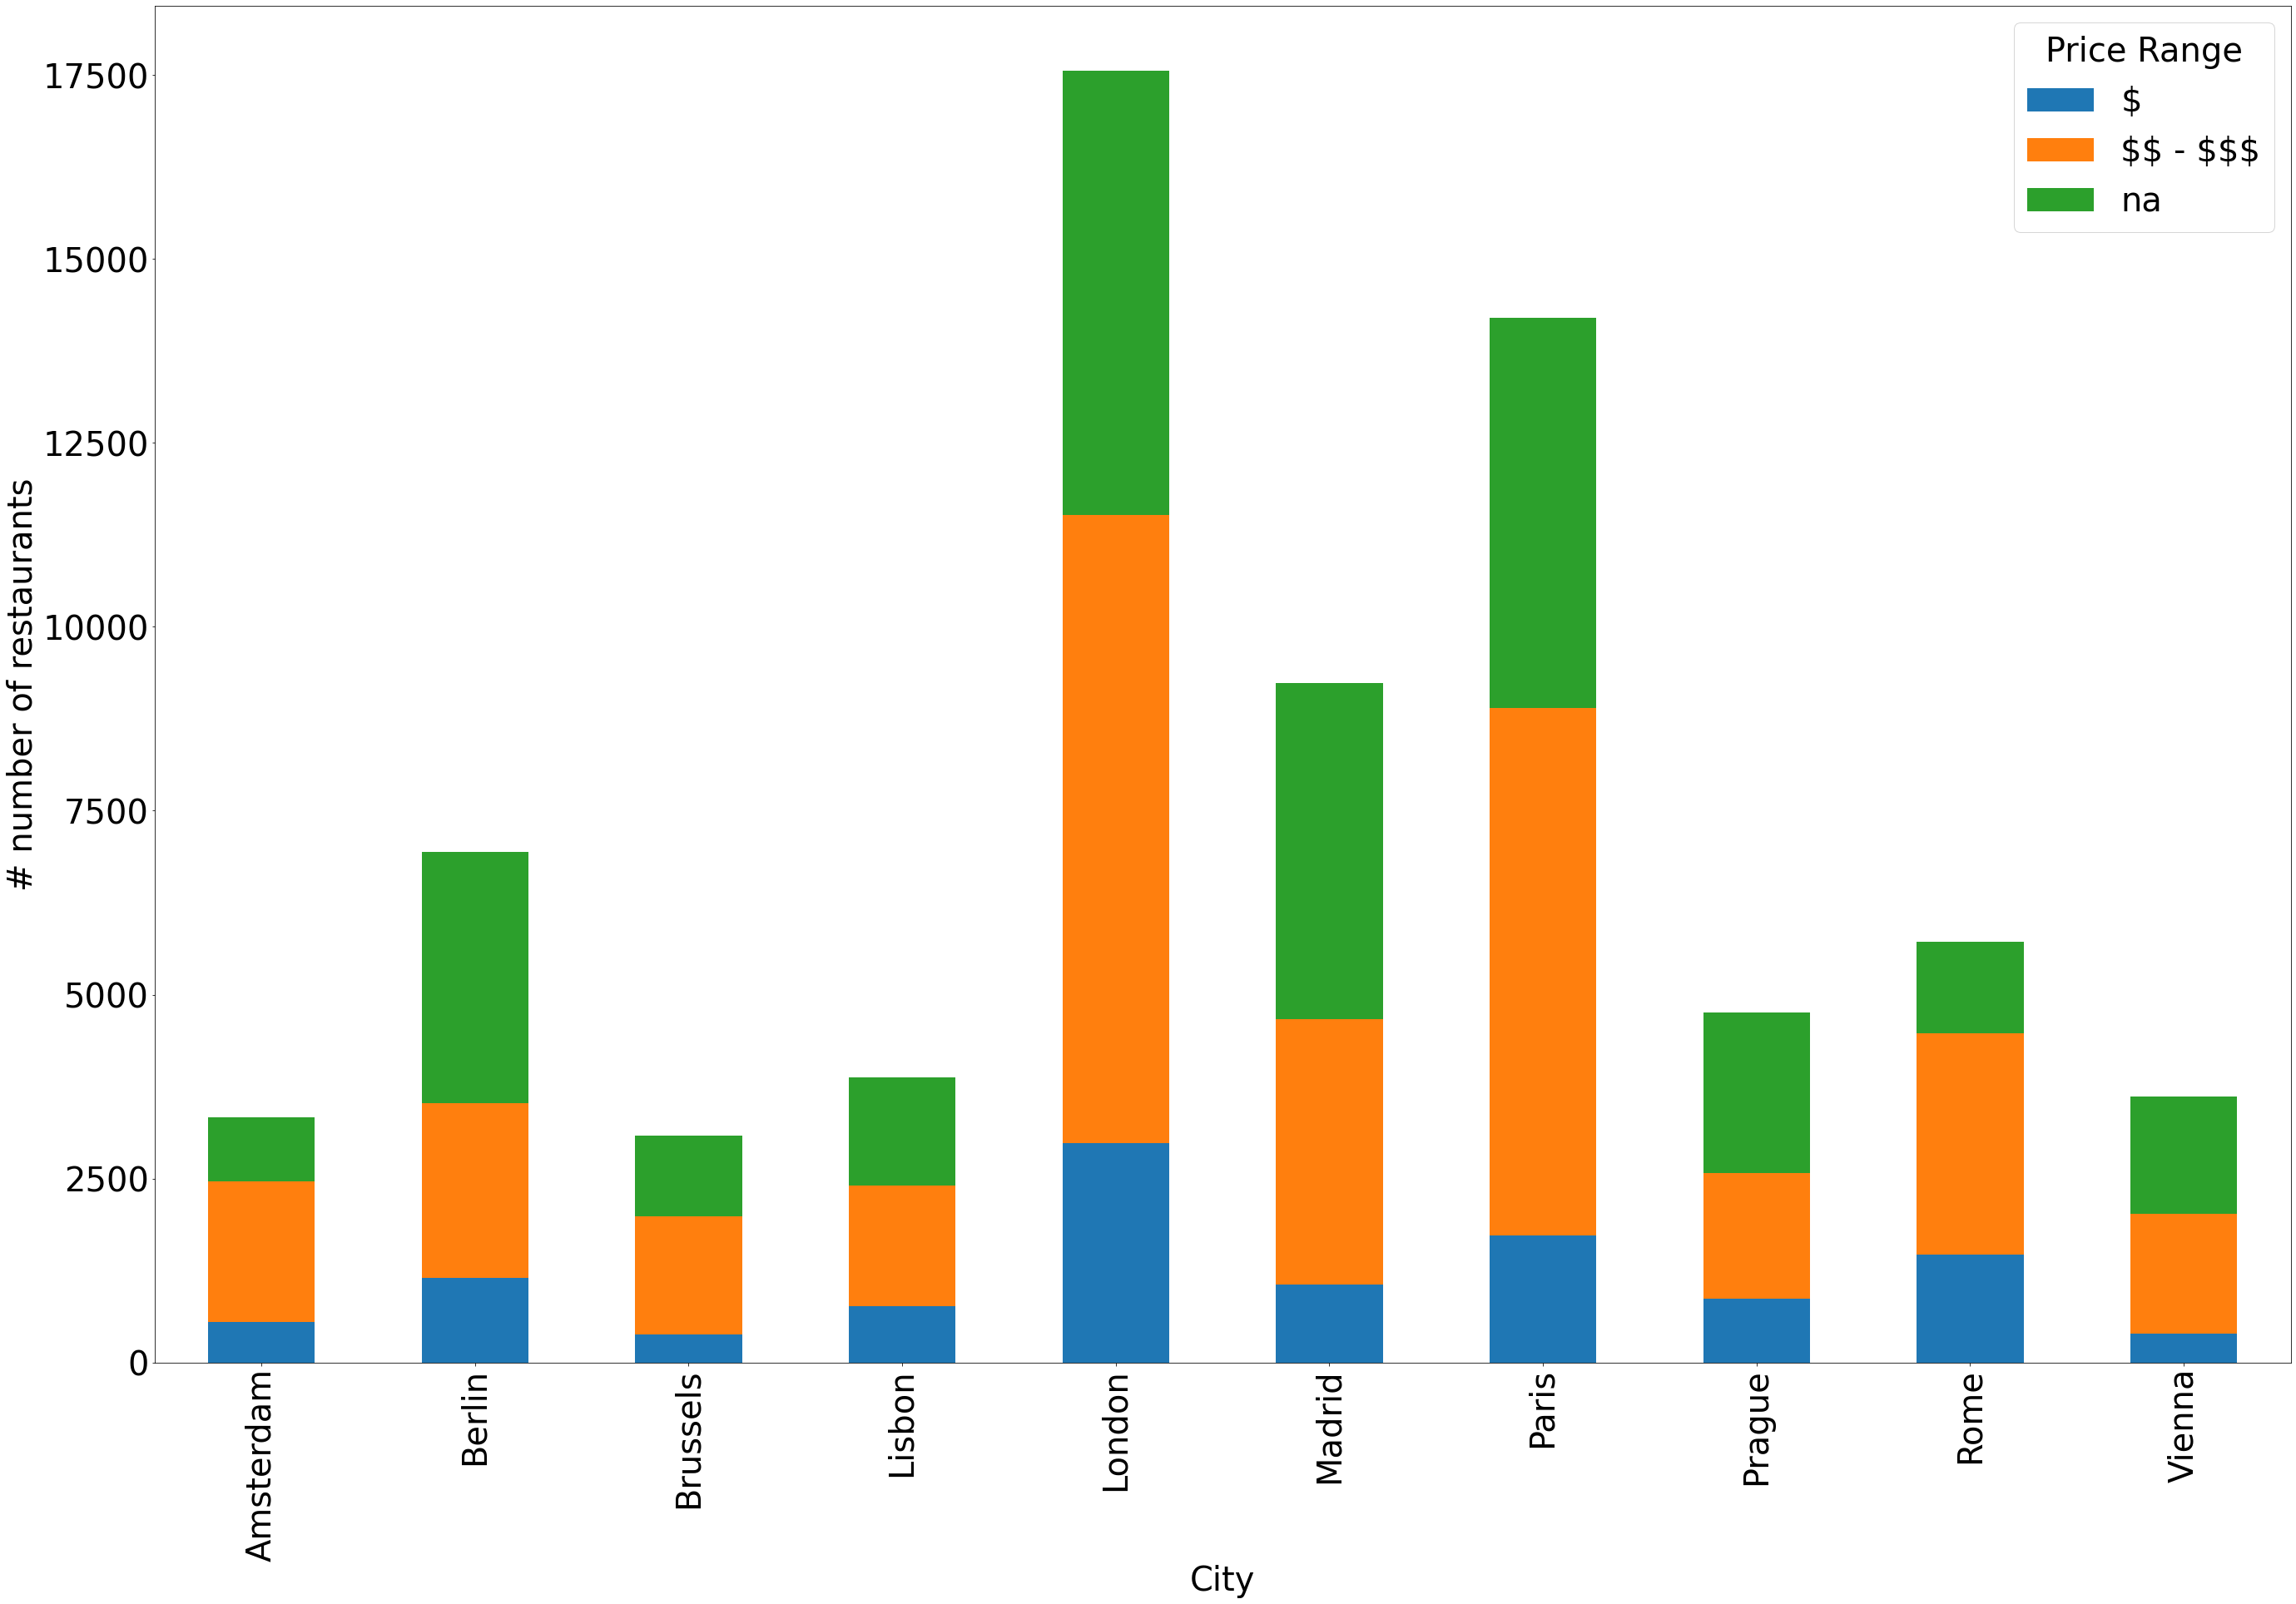

In [ ]:
df_count.plot(kind="bar",stacked=True, figsize=(46,30))
plt.ylabel("# number of restaurants");

### Important things in this plot -> it is messy! order your plot

In [ ]:
# add a new column with the total number of restaurants
df_count["total_restaurants"] = df_count.sum(axis=1)

In [ ]:
# sort values
df_count.sort_values(by="total_restaurants", inplace=True)

In [ ]:
df_count.head(2)

Price Range,$,$$ - $$$,na,total_restaurants
City,,,,
Brussels,385,1599,1096,3080
Amsterdam,546,1915,867,3328


In [ ]:
# remember that all the columns with numerical values will be added as a new category to the plot!
# -- we need to remove the total_restaunts, 
total_restaurants = df_count["total_restaurants"]
max_total_restaurants = total_restaurants.max()
df_count.drop(columns=["total_restaurants"], inplace=True)

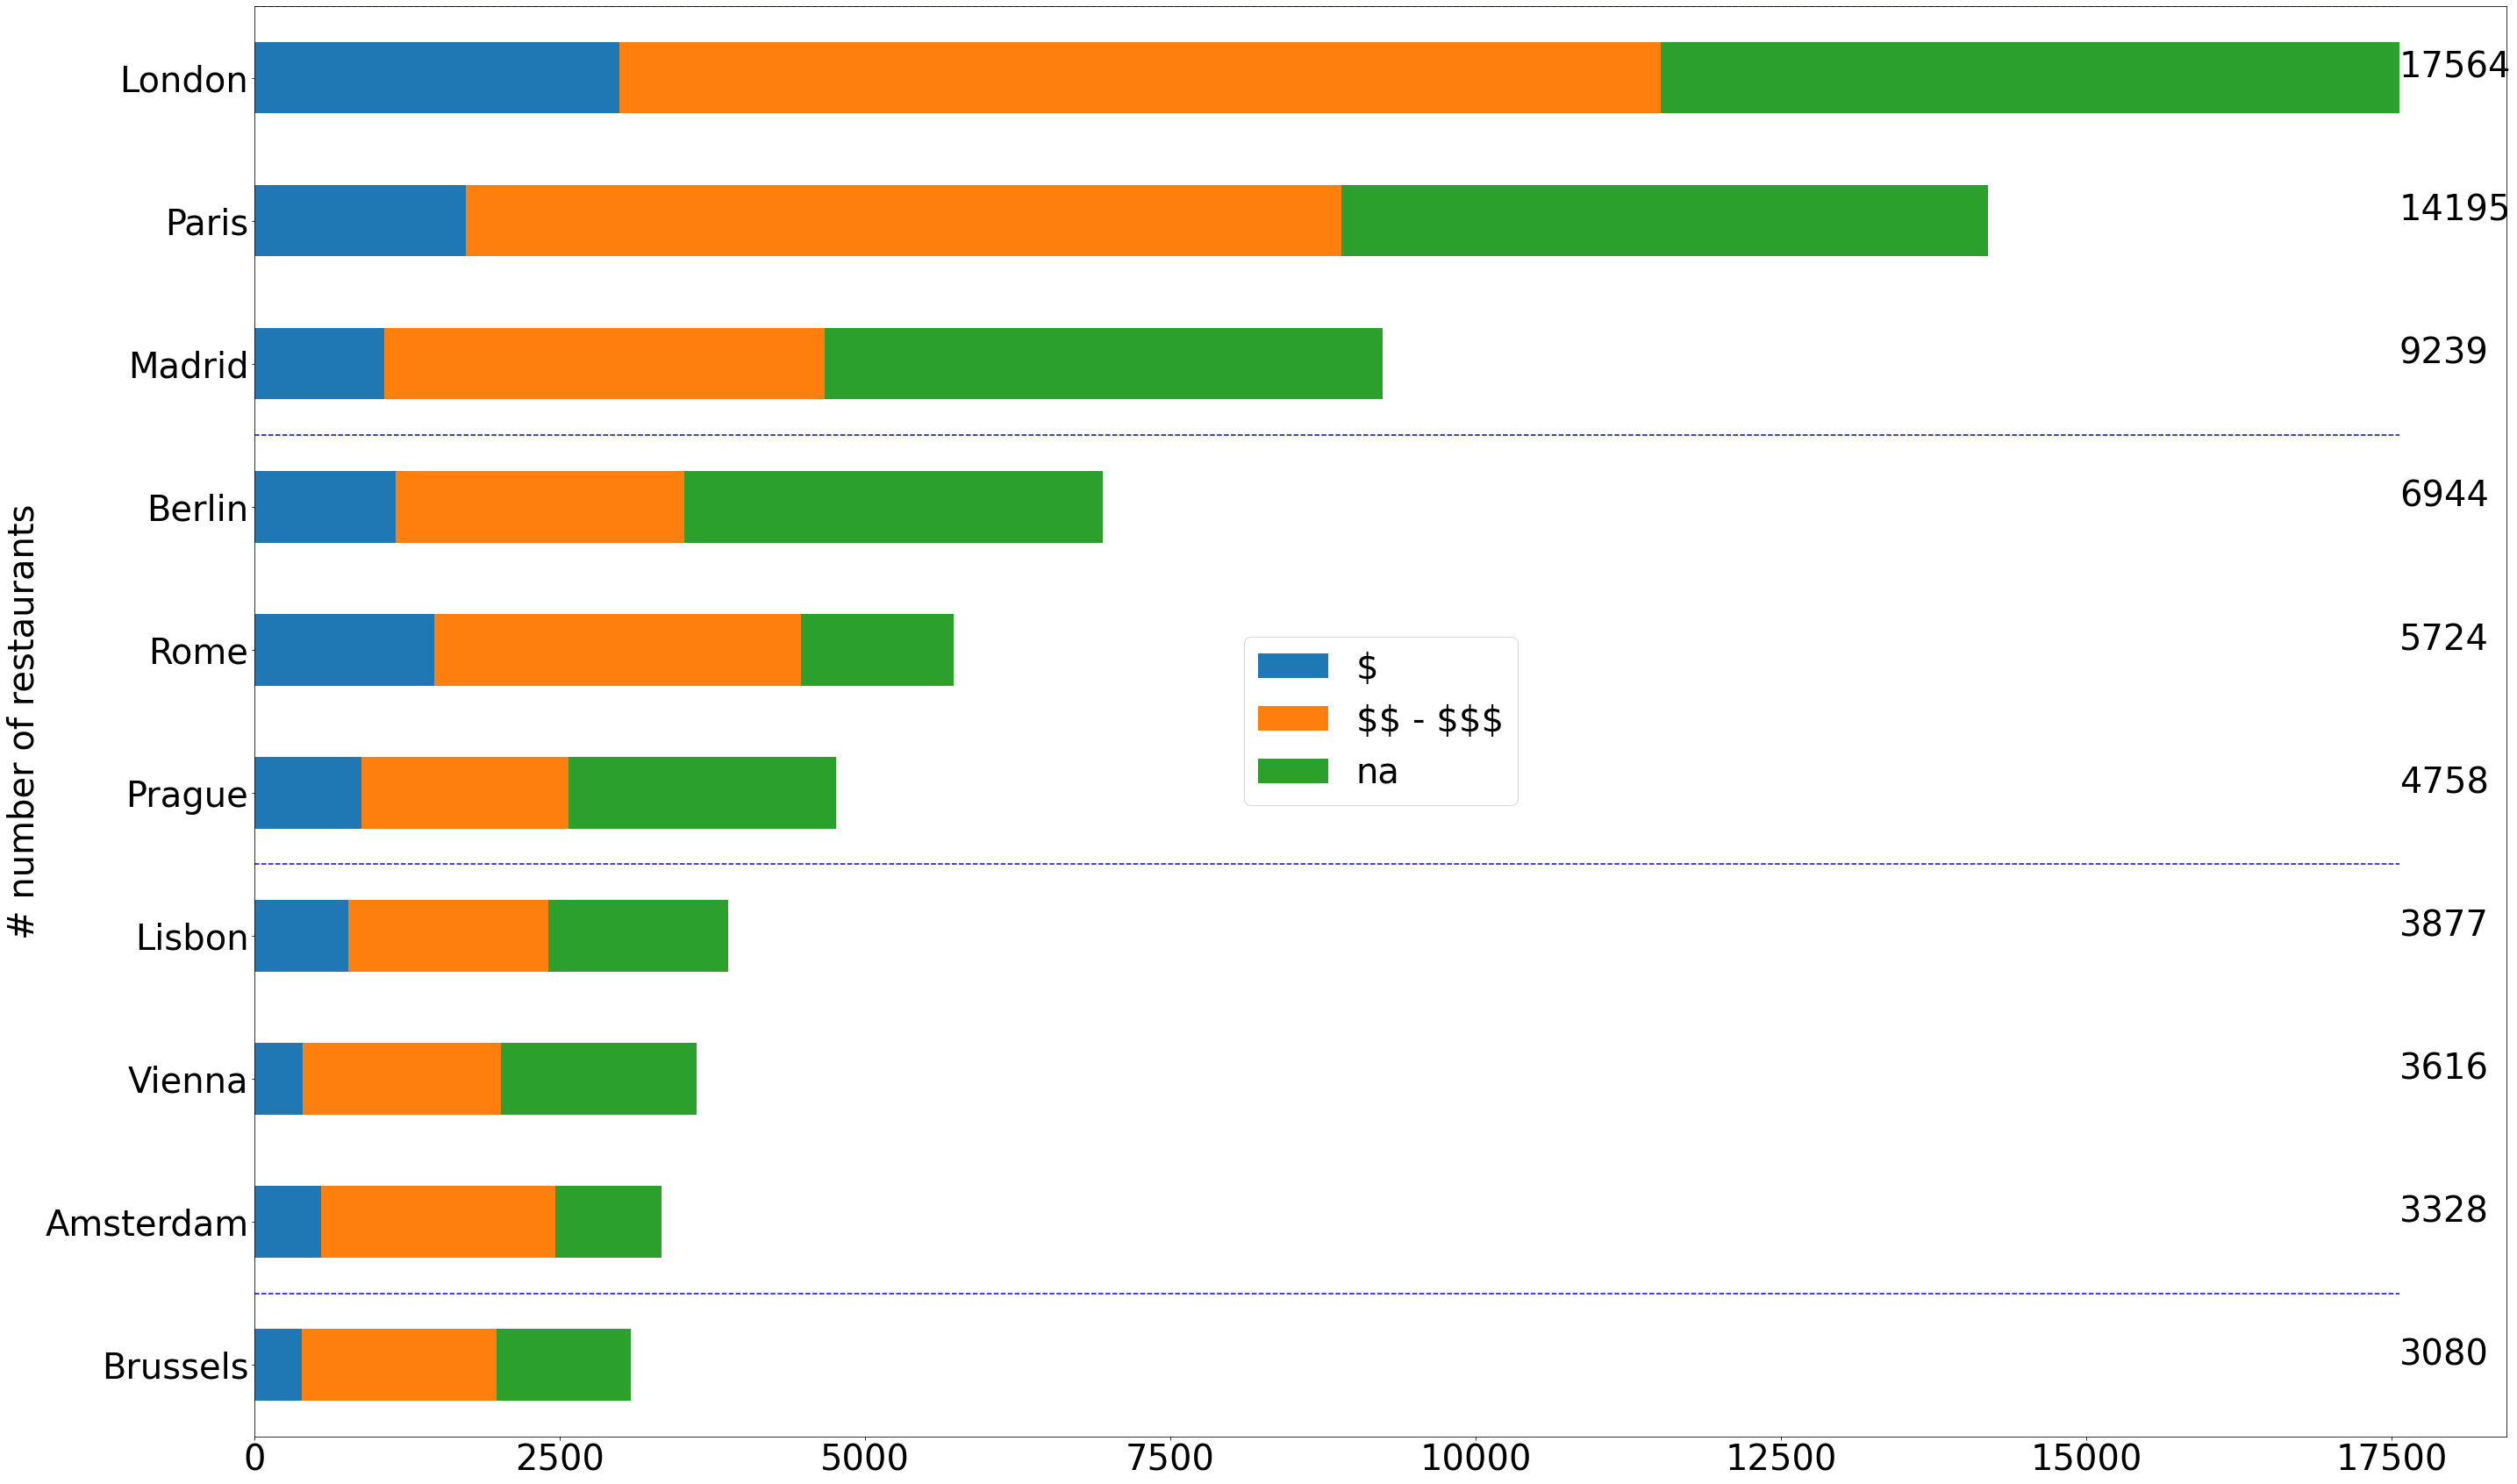

In [ ]:
#plot - this time in the horizontal directions, as we have a large list and it is best viewed a
df_count.plot(kind="barh", stacked=True, figsize=(46,30))
plt.ylabel("# number of restaurants");
[plt.text(max(total_restaurants), (i), str(total_restaurants[i])) for i in range(len(df_count))]
plt.legend(loc="center")
[plt.plot([0,max_total_restaurants], [i+0.5,i+0.5], "b--") for i in range(0,len(df_count),3)];

### Things to note about this representation
-- As with the mosaic plot, to represent categories, we must first "count" their sizes.  
-- Again the area of each box makes it easy to identify the largets market  
-- Ordering is a must! - if there is no intrinsic order, e.g., time, that relates your bars, order by size\!  
-- Same quantities should have the same color  
-- Total numbers should appear in the plot, associated to the respective bar -> if aligned to the right, add lines to make it easier to associate each total to the bar
### For this to be a fully textbook representation, we are missing:
1. There are also general rules on the width of each bar and the gap between bars. They are not enforced in python default libraries\!  
Check more overall guidelines in the textbook or in https://diagrammm.com/bar_chart

# The above plots are already an example of numerical to categorigal plot
-- However, we were concerned about counting elements in the categories  
-- In a more general setting of a categorical and numerical variables, we are often interested in checking the distribution of the numerical variable for each separated category  

As before, it is usually helpfull to first pivot our dataframe, so that the values of the categorical variables become columns

In [ ]:
df.head(2)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1,5,$$ - $$$,136,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
6,6,Zaza's,Amsterdam,"['French', 'International', 'Mediterranean', '...",7,4.5,$$ - $$$,1455,"[['40th Birthday with my Family', 'One of the ...",/Restaurant_Review-g188590-d1014732-Reviews-Za...,d1014732


In [ ]:
#We start by choosing just the subset of columns we are interested in, and converting the data to a proper format
df_rate = df[["City", "Rating"]].dropna()
df_rate["Rating"] = df_rate["Rating"].astype("float")
df_rate.head(2)

,City,Rating
0,Amsterdam,5.0
6,Amsterdam,4.5


In [ ]:
#Then we select the categorical variable whose values will become the columsn (as you did in the above exercise)
ratings_per_town = df_rate.pivot(columns="City")["Rating"]

Text(0, 0.5, 'Ratings')

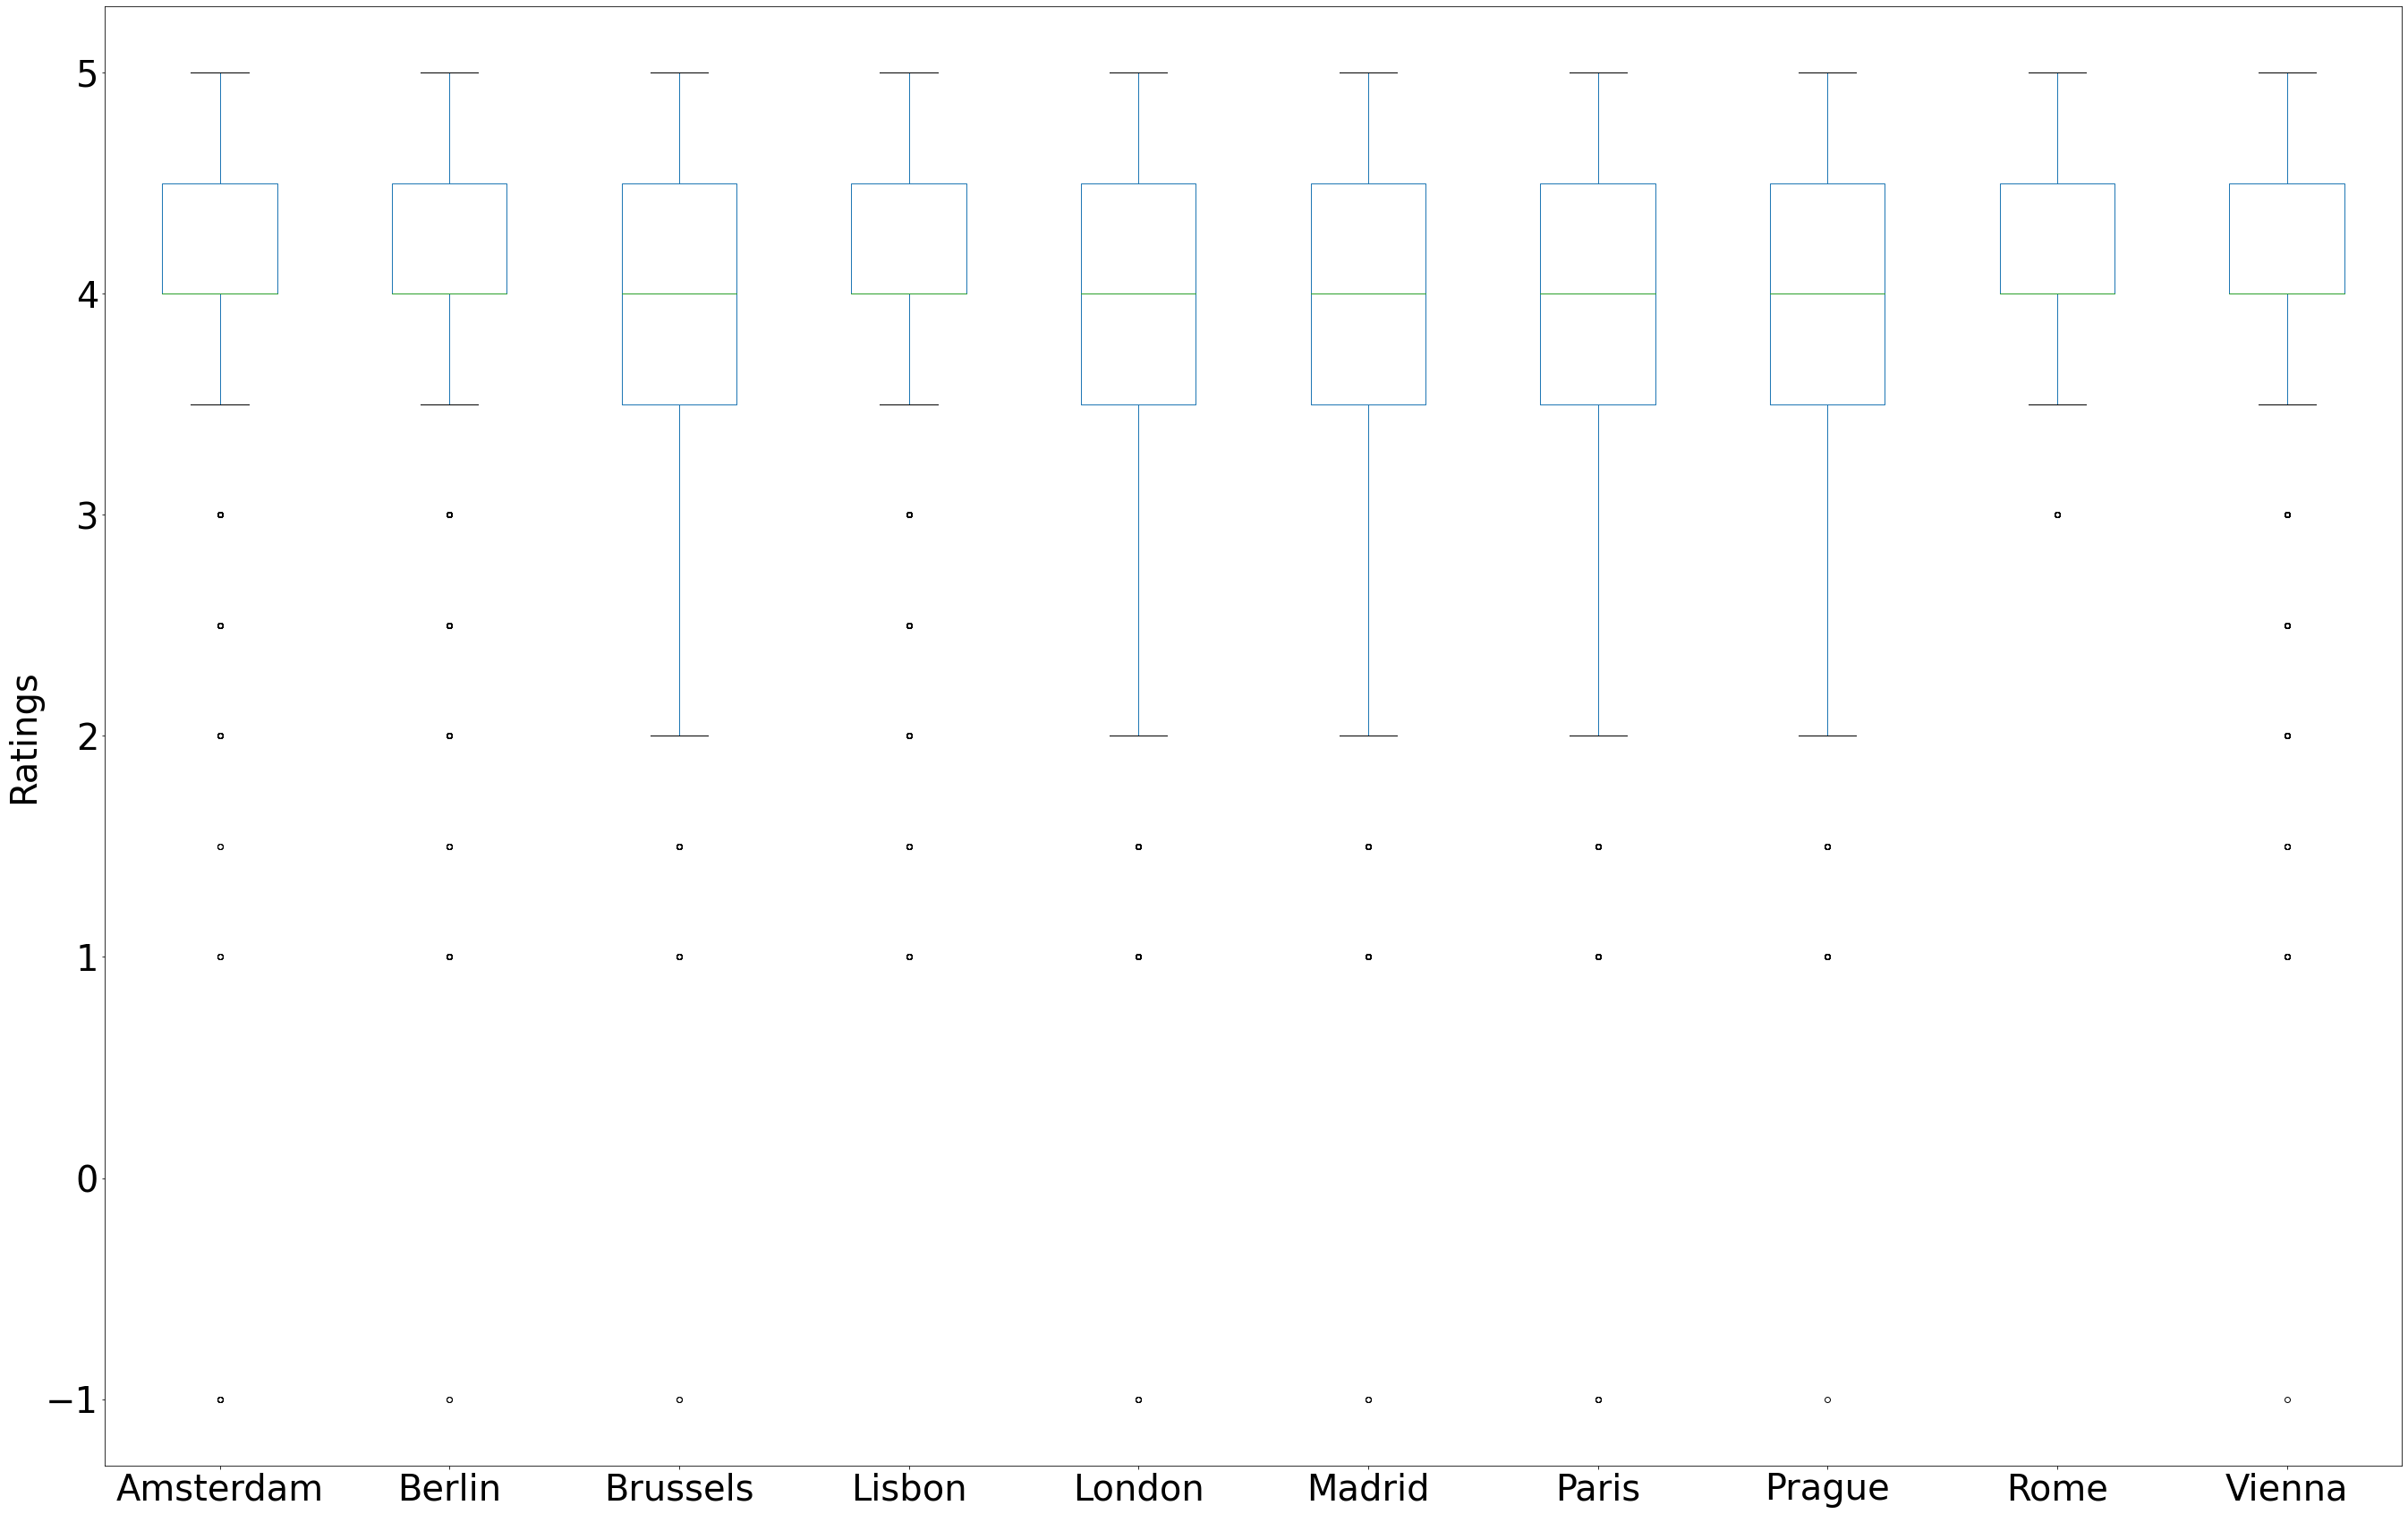

In [ ]:
#Pandas will automatically represent your data, each "category" in its place
ratings_per_town.plot.box(figsize=(46,30))

ticks_pos = plt.xticks()
plt.xticks(ticks=ticks_pos[0], labels=ratings_per_town.columns);
plt.ylabel("Ratings")

### Important things in a box plot representation:
-- The line in the center represents median values  
-- The box represents 50% of data, the lower limit is 25% and the upper limit is 75%. Ouliers are presentes outside the whiskerswhiskers
-- The representation lacks detail on the actual distribution inside the box: we only get a sense if it balanced or unbalaced, central points, etc..

### Programming notes:
By default, Ratings was a string. We converted it to float:
"df_rate['Rating'] = df_rate['Rating'].astype('float')"

### We can add more info on the distribution

In [ ]:
dist_parameters = pd.concat([ratings_per_town.mean().rename("mean_rating"),
                             ratings_per_town.median().rename("median_rating"), 
                             ratings_per_town.std().rename("std_rating")],axis=1)
#dist_parameters.rename(columns={0:"mean_rating", 1:"median_rating", 2:"std_rating"},inplace=True)
dist_parameters.sort_values(by="mean_rating", inplace=True)

In [ ]:
dist_parameters.head(2)

,mean_rating,median_rating,std_rating
City,,,
Madrid,3.786611,4.0,0.751574
Brussels,3.882556,4.0,0.676787


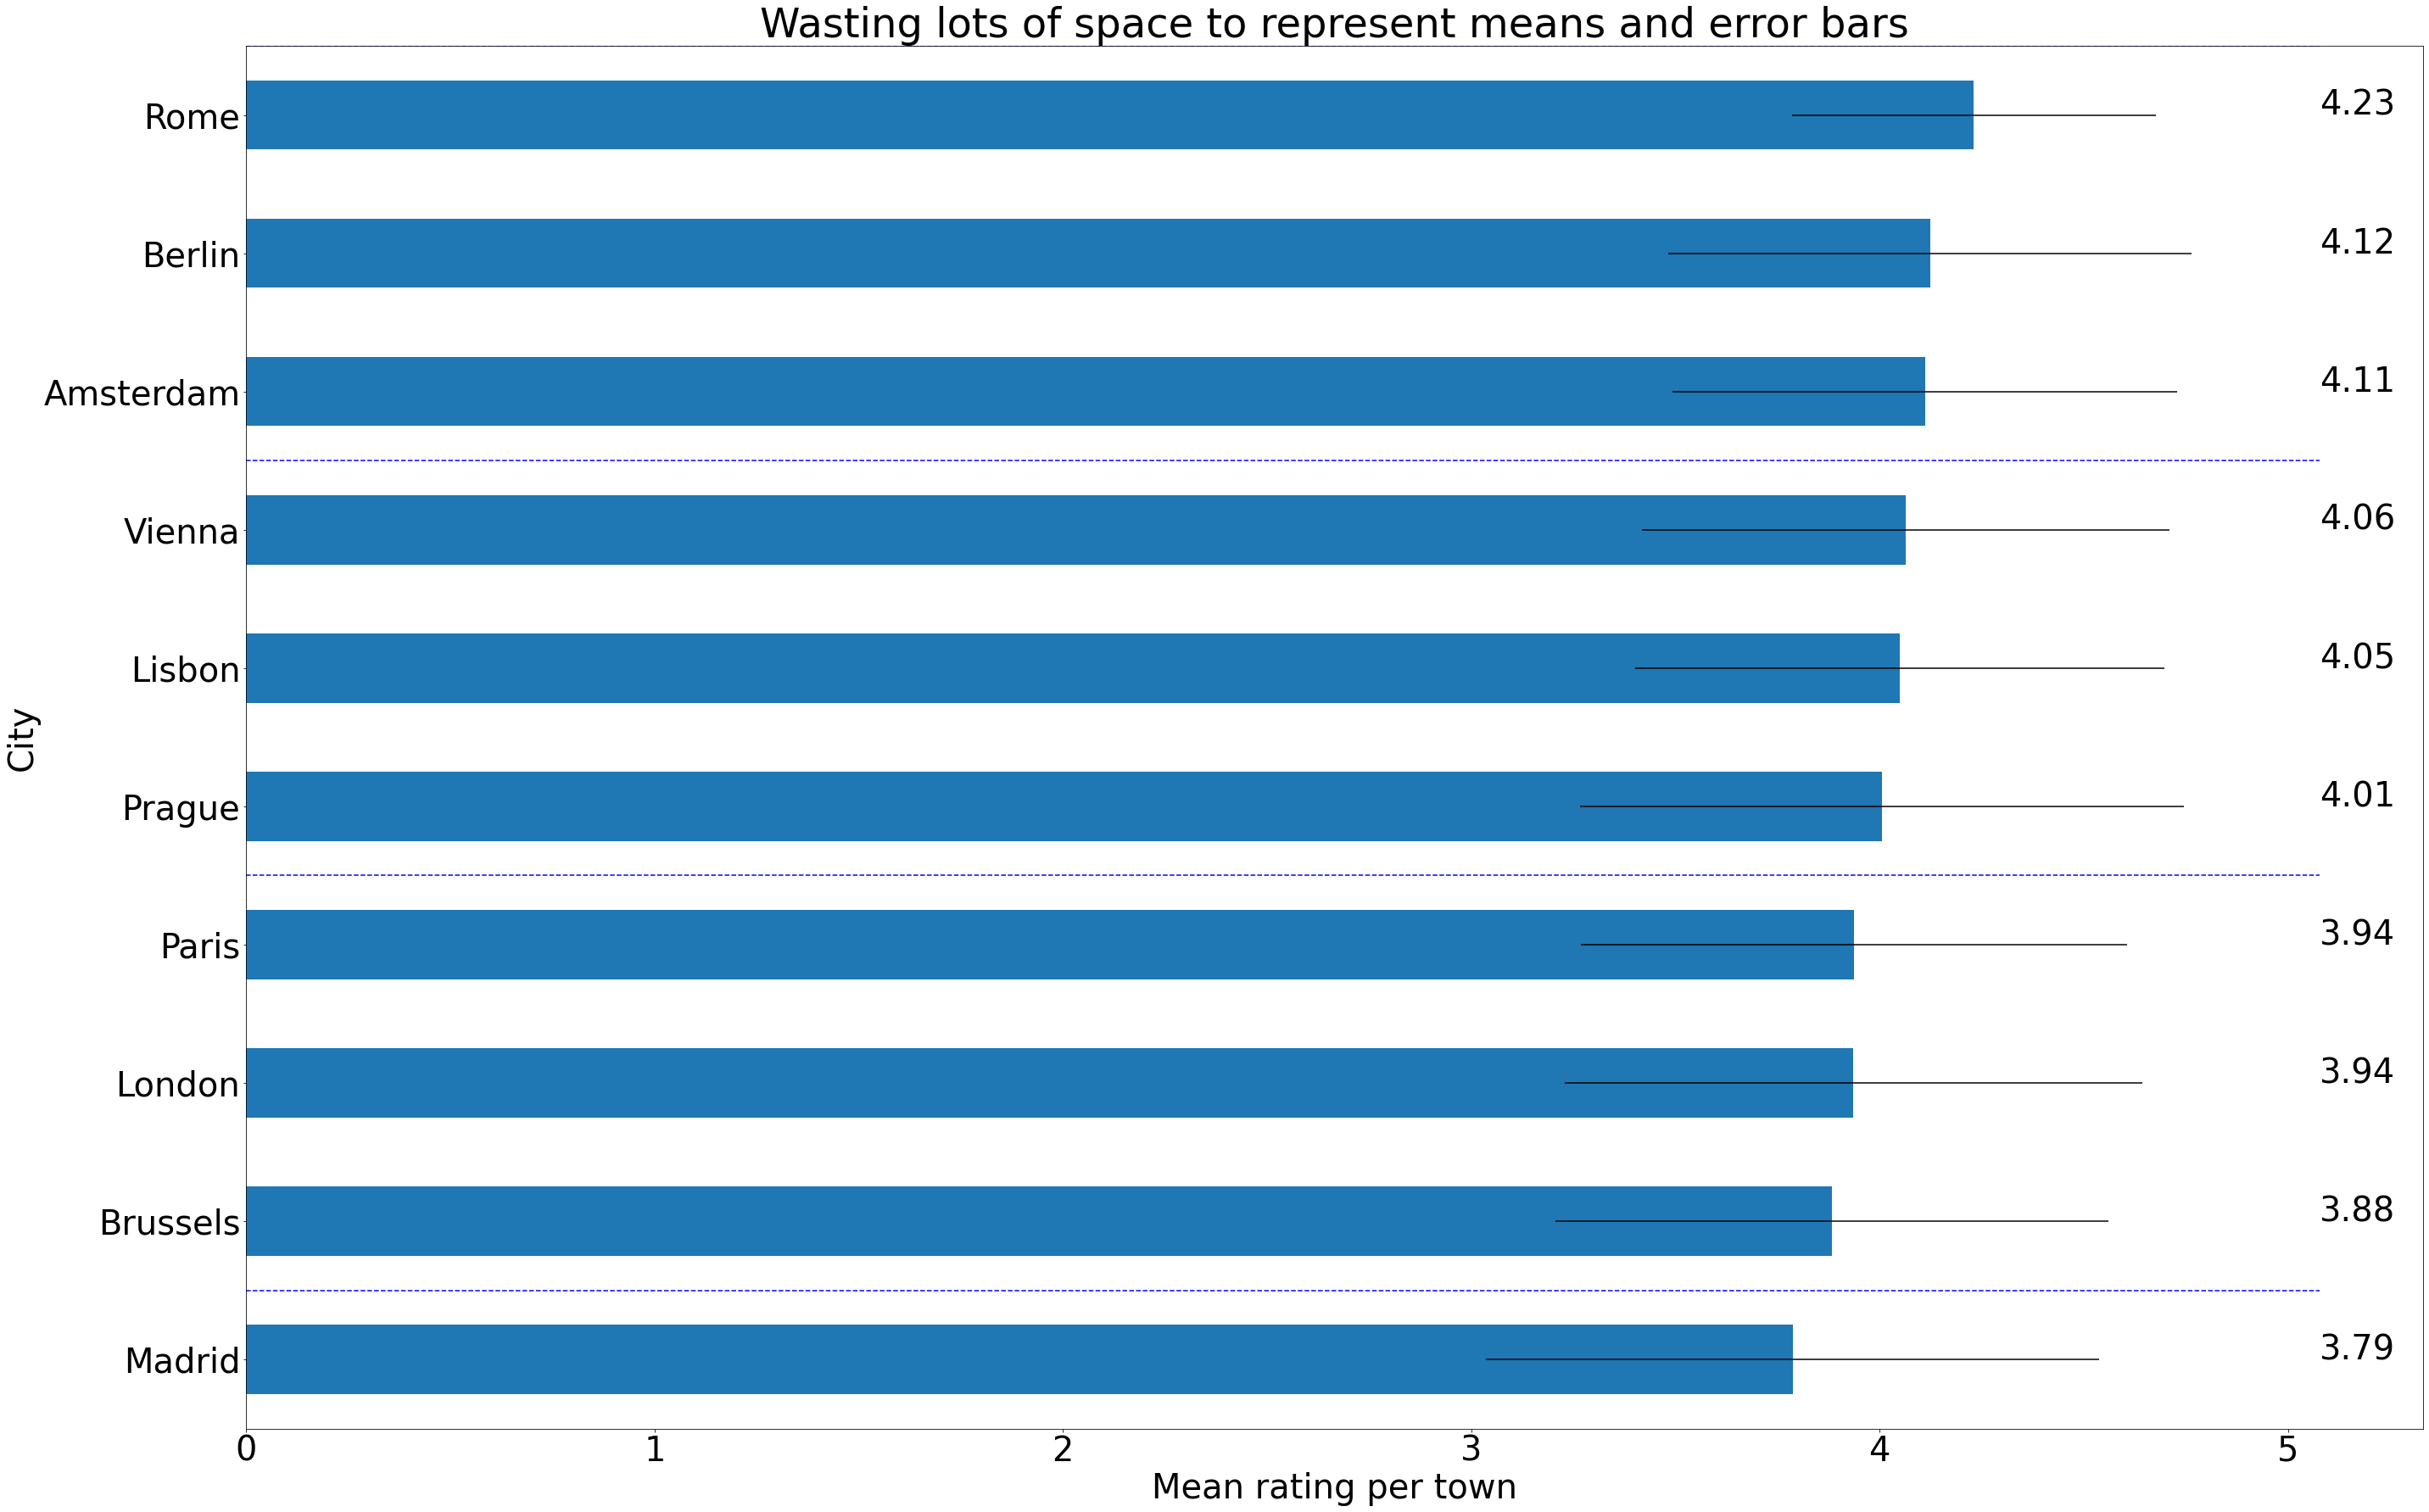

In [ ]:
dist_parameters["mean_rating"].plot.barh(xerr=dist_parameters["std_rating"],figsize=(46,30))
[plt.text(max(dist_parameters.mean_rating)*1.2, (i), f"{dist_parameters.mean_rating[i]:.2f}") for i in range(len(df_count))]
plt.title("Wasting lots of space to represent means and error bars");
plt.xlabel("Mean rating per town");
[plt.plot([0,max(dist_parameters.mean_rating)*1.2], [i+0.5,i+0.5], "b--") for i in range(0,len(dist_parameters),3)];

### Breaking axis:
To emphasize differences that are relatively smaller than the range of your plot, break the axis.   
-- By breaking the axis explecitly you **make the viewer aware that the scale is incorrect.**  
Check the matplotlib documentation: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/broken_axis.html

**Note: you are not expected to know how to do this! - but you can use it!**

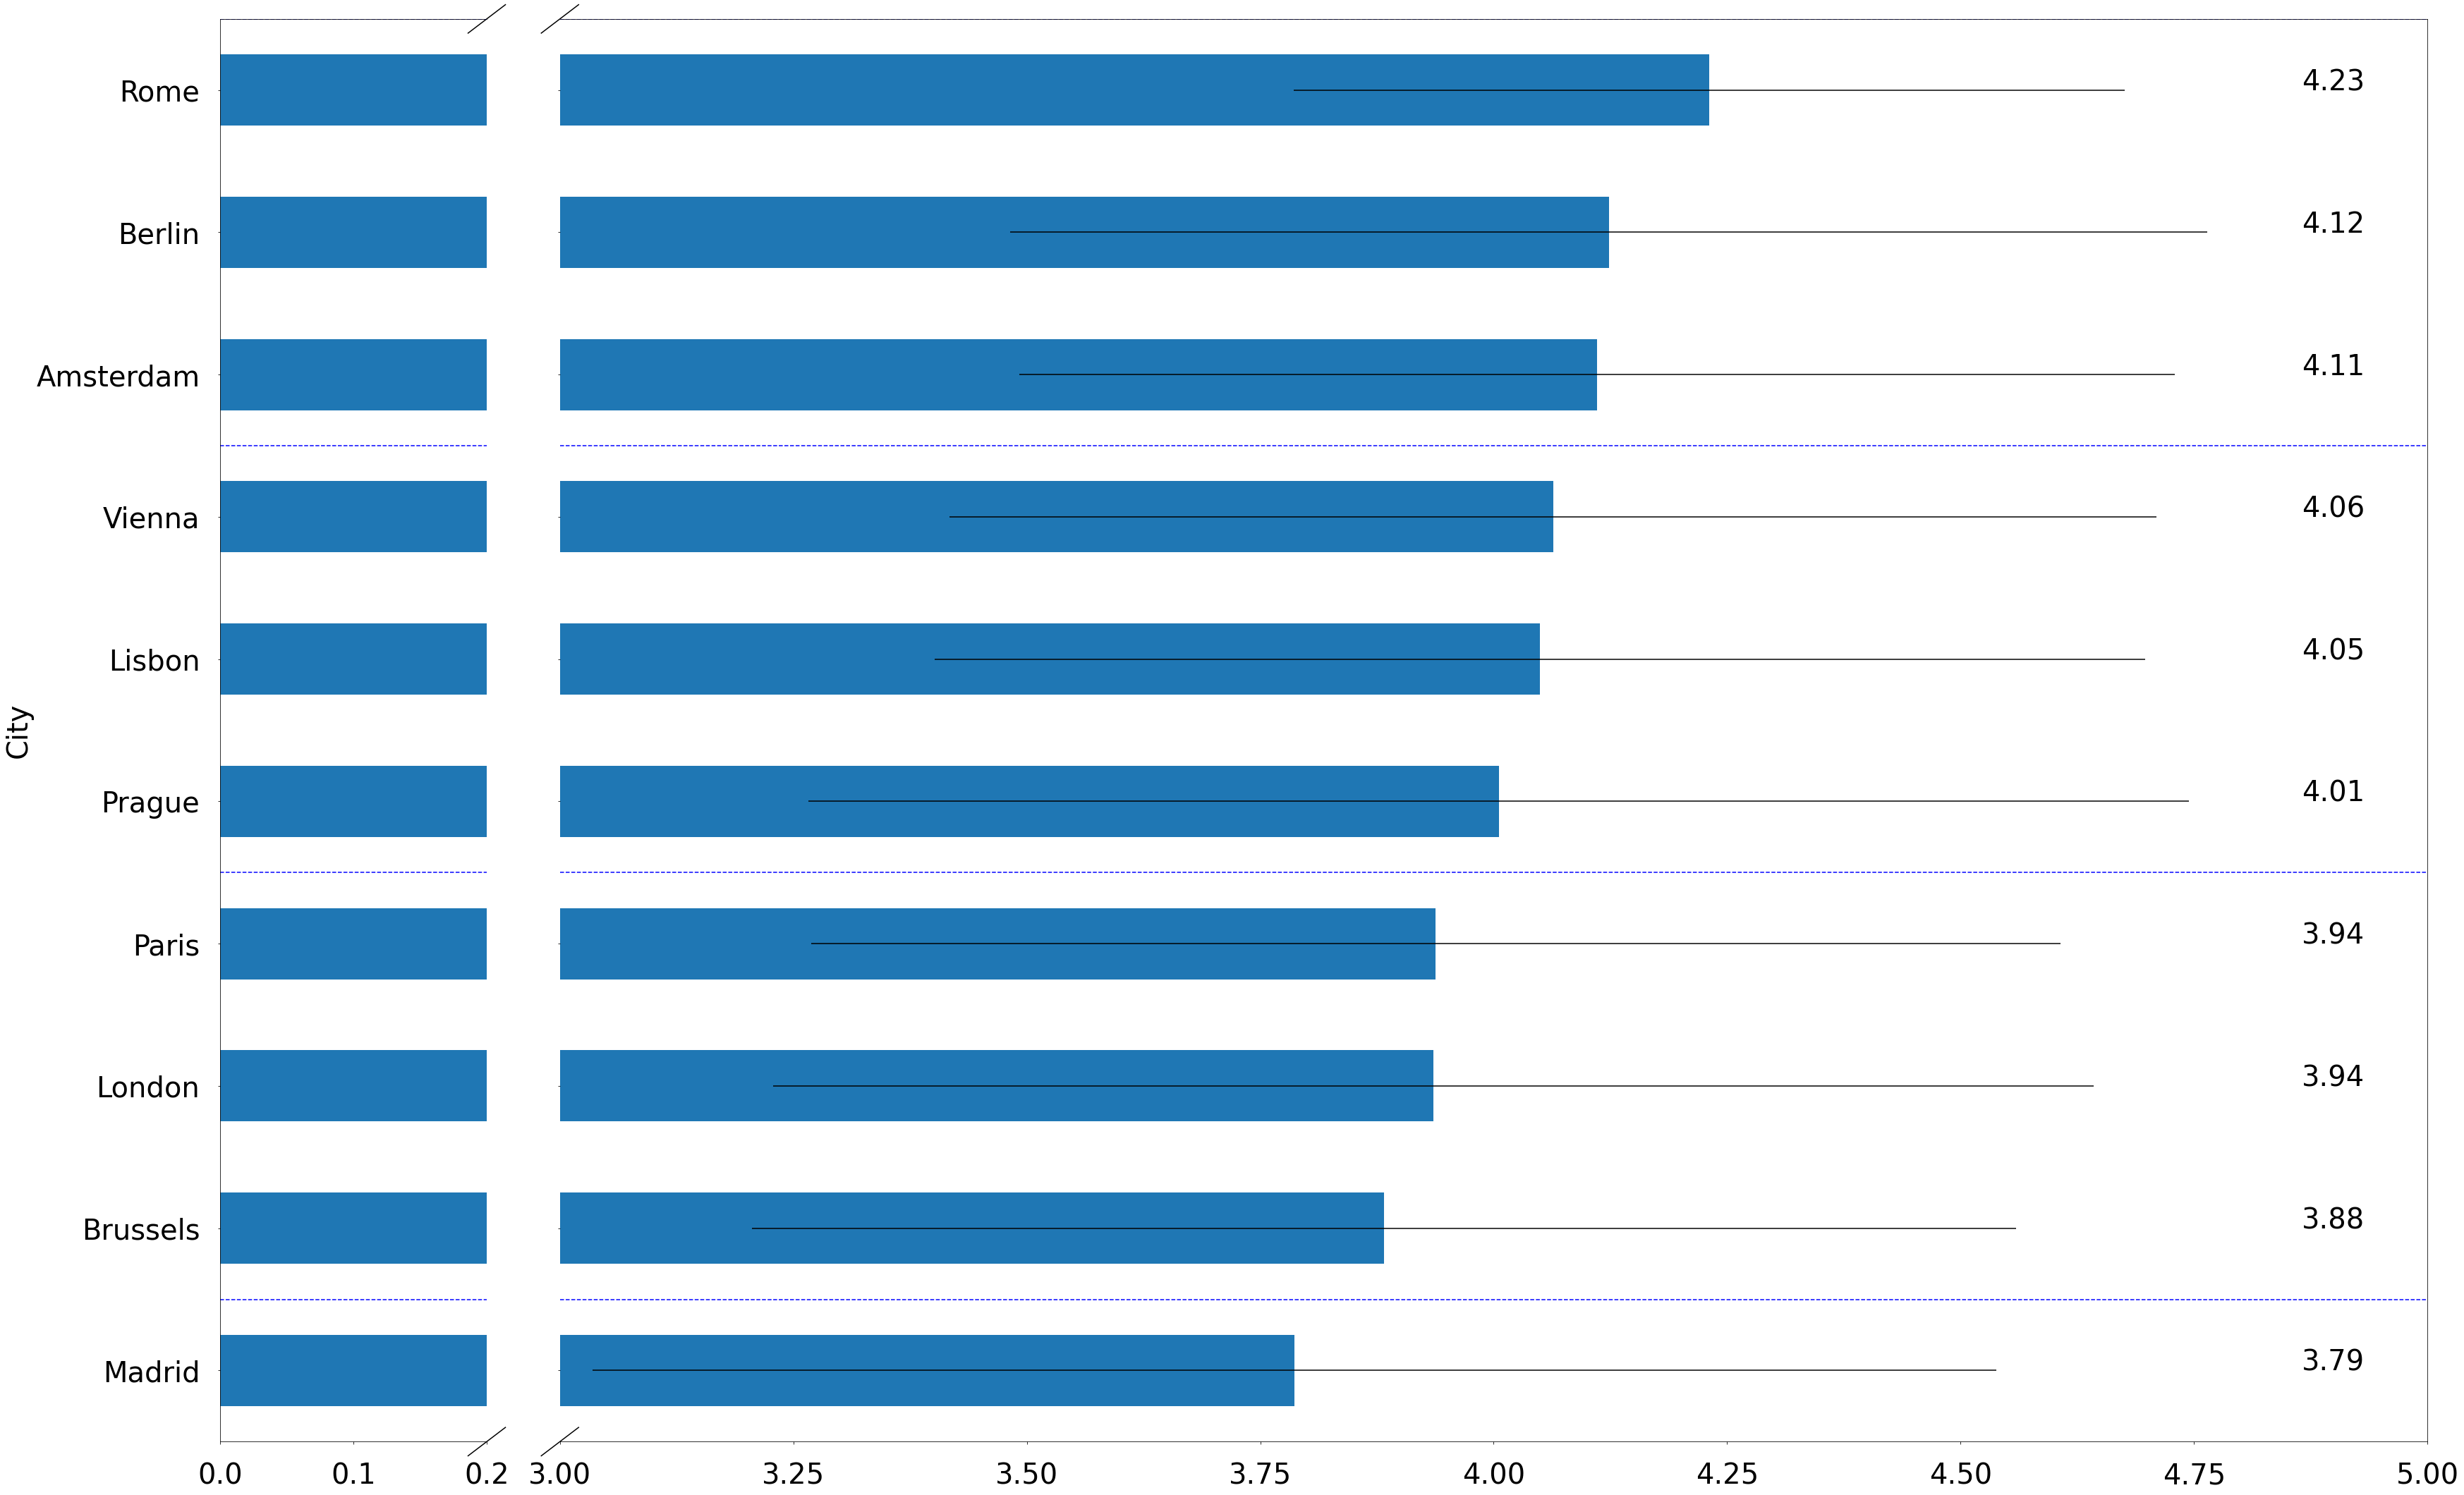

In [ ]:
# define visualization parameters
w_ratio = 7                # ratio between 
limit_first = (0,0.2)      # the limit of the lower half axis -> we will break it at 0.2
limit_second = (3, 5)      # the limits at the upper bound -> we will focus in the region between 3 and 5
gap_size=1                 # the size of the gap between the lower and the upper part
d = .01  # how big to make the diagonal lines in axes coordinates

# the idea is to plot the graph in two subplots, one with the lower part, and the second with the upper part
# then we remove the axis in the gap region and add the breaking lines

# 1 - create two subplots, and define a gap between the two
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, w_ratio]}, figsize=(46,30))
f.tight_layout(pad=gap_size)

# 2 - Plot the data in each subplot, and set the limits defined above
dist_parameters["mean_rating"].plot.barh(xerr=dist_parameters["std_rating"],ax=ax)
ax.set_xlim(limit_first)
dist_parameters["mean_rating"].plot.barh(xerr=dist_parameters["std_rating"],ax=ax2)
ax2.set_xlim(limit_second)

# 3 - Fix the axis in the gap
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='major', pad=25)
ax2.tick_params(axis='both', which='major', pad=25)

# 4 - Add break lines
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d*w_ratio, 1+d*w_ratio), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1-d*w_ratio, 1+d*w_ratio), (1 - d, 1 + d) , **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot(( - d,  + d), ( - d,  + d), **kwargs);  # bottom-right diagonal;

# add the mean values on the right hand subplot and the lines in both plots
[ax2.text(max(dist_parameters.mean_rating)*1.15, (i), f"{dist_parameters.mean_rating[i]:.2f}") for i in range(len(df_count))]
[ax2.plot([0,max(dist_parameters.mean_rating)*1.2], [i+0.5,i+0.5], "b--") for i in range(0,len(dist_parameters),3)];
[ax.plot([limit_first[0], limit_first[1] ], [i+0.5,i+0.5], "b--") for i in range(0,len(dist_parameters),3)];

### Important aspects in the representation
-- If representing averages using a bar plot, you should also add the error bar  
-- While the box plot represents medians and percentiles - and thus gives us an idea of inbalance in the dataset, error bars are by default symmetric - we lose information  
-- Again, order the bars, add totals and make easy to associate the total to each bar  
-- It is better to break a plot than to start a bar from a value different from 0, highlighting the break in proportionality:   
------ Our brains work best with proportionaly rules. If we highlight only the top of the plot, our brains would over emphasize differences.  

### Programing notes:
We saw how to compute statistical metrics over subsets of our dataset   

``` 
  ratings_per_town = df_rate.pivot(columns="City")["Rating"]
  ratings_per_town.mean().rename("mean_ratings")  
```
We saw how to concatenate dataframes that have the same index -- in this case towns
dist_parameters = pd.concat([ratings_per_town.mean(),ratings_per_town.median(), ratings_per_town.std()],axis=1)  
 
We saw how to format numbers into strings  
-- converts a number to string: str(25)
-- converts a number to a string in a specific format: f"{your_number:.nf}" - n is the number of decimals

I do not expect you to follow the details on how to break axis!   


## Back to our restaurants: So we see that most reviews are exceptional. 
But does this fit our perception? Is it possible that all the restaurants have so many good reviews?  
Is it possible that there is some bias in smaller/newer restaurants, where most reviews are probably not all from regular customers?

We can further look into the rating distributions of those restaurants with very few reviews, from those with a high number of reviews.

### To test our hypothesis, we use an histogram of number of reviews split by city  
**First** create a pivot table that maps each restaurant to a city, and take the number of reviews for that restaurant. 

In [ ]:
numbers_dist_per_town = df.pivot(columns="City")["Number of Reviews"]

**then** we can plot them all together using an histogram with the stacked=True option

Text(0.5, 0, 'number of reviews')

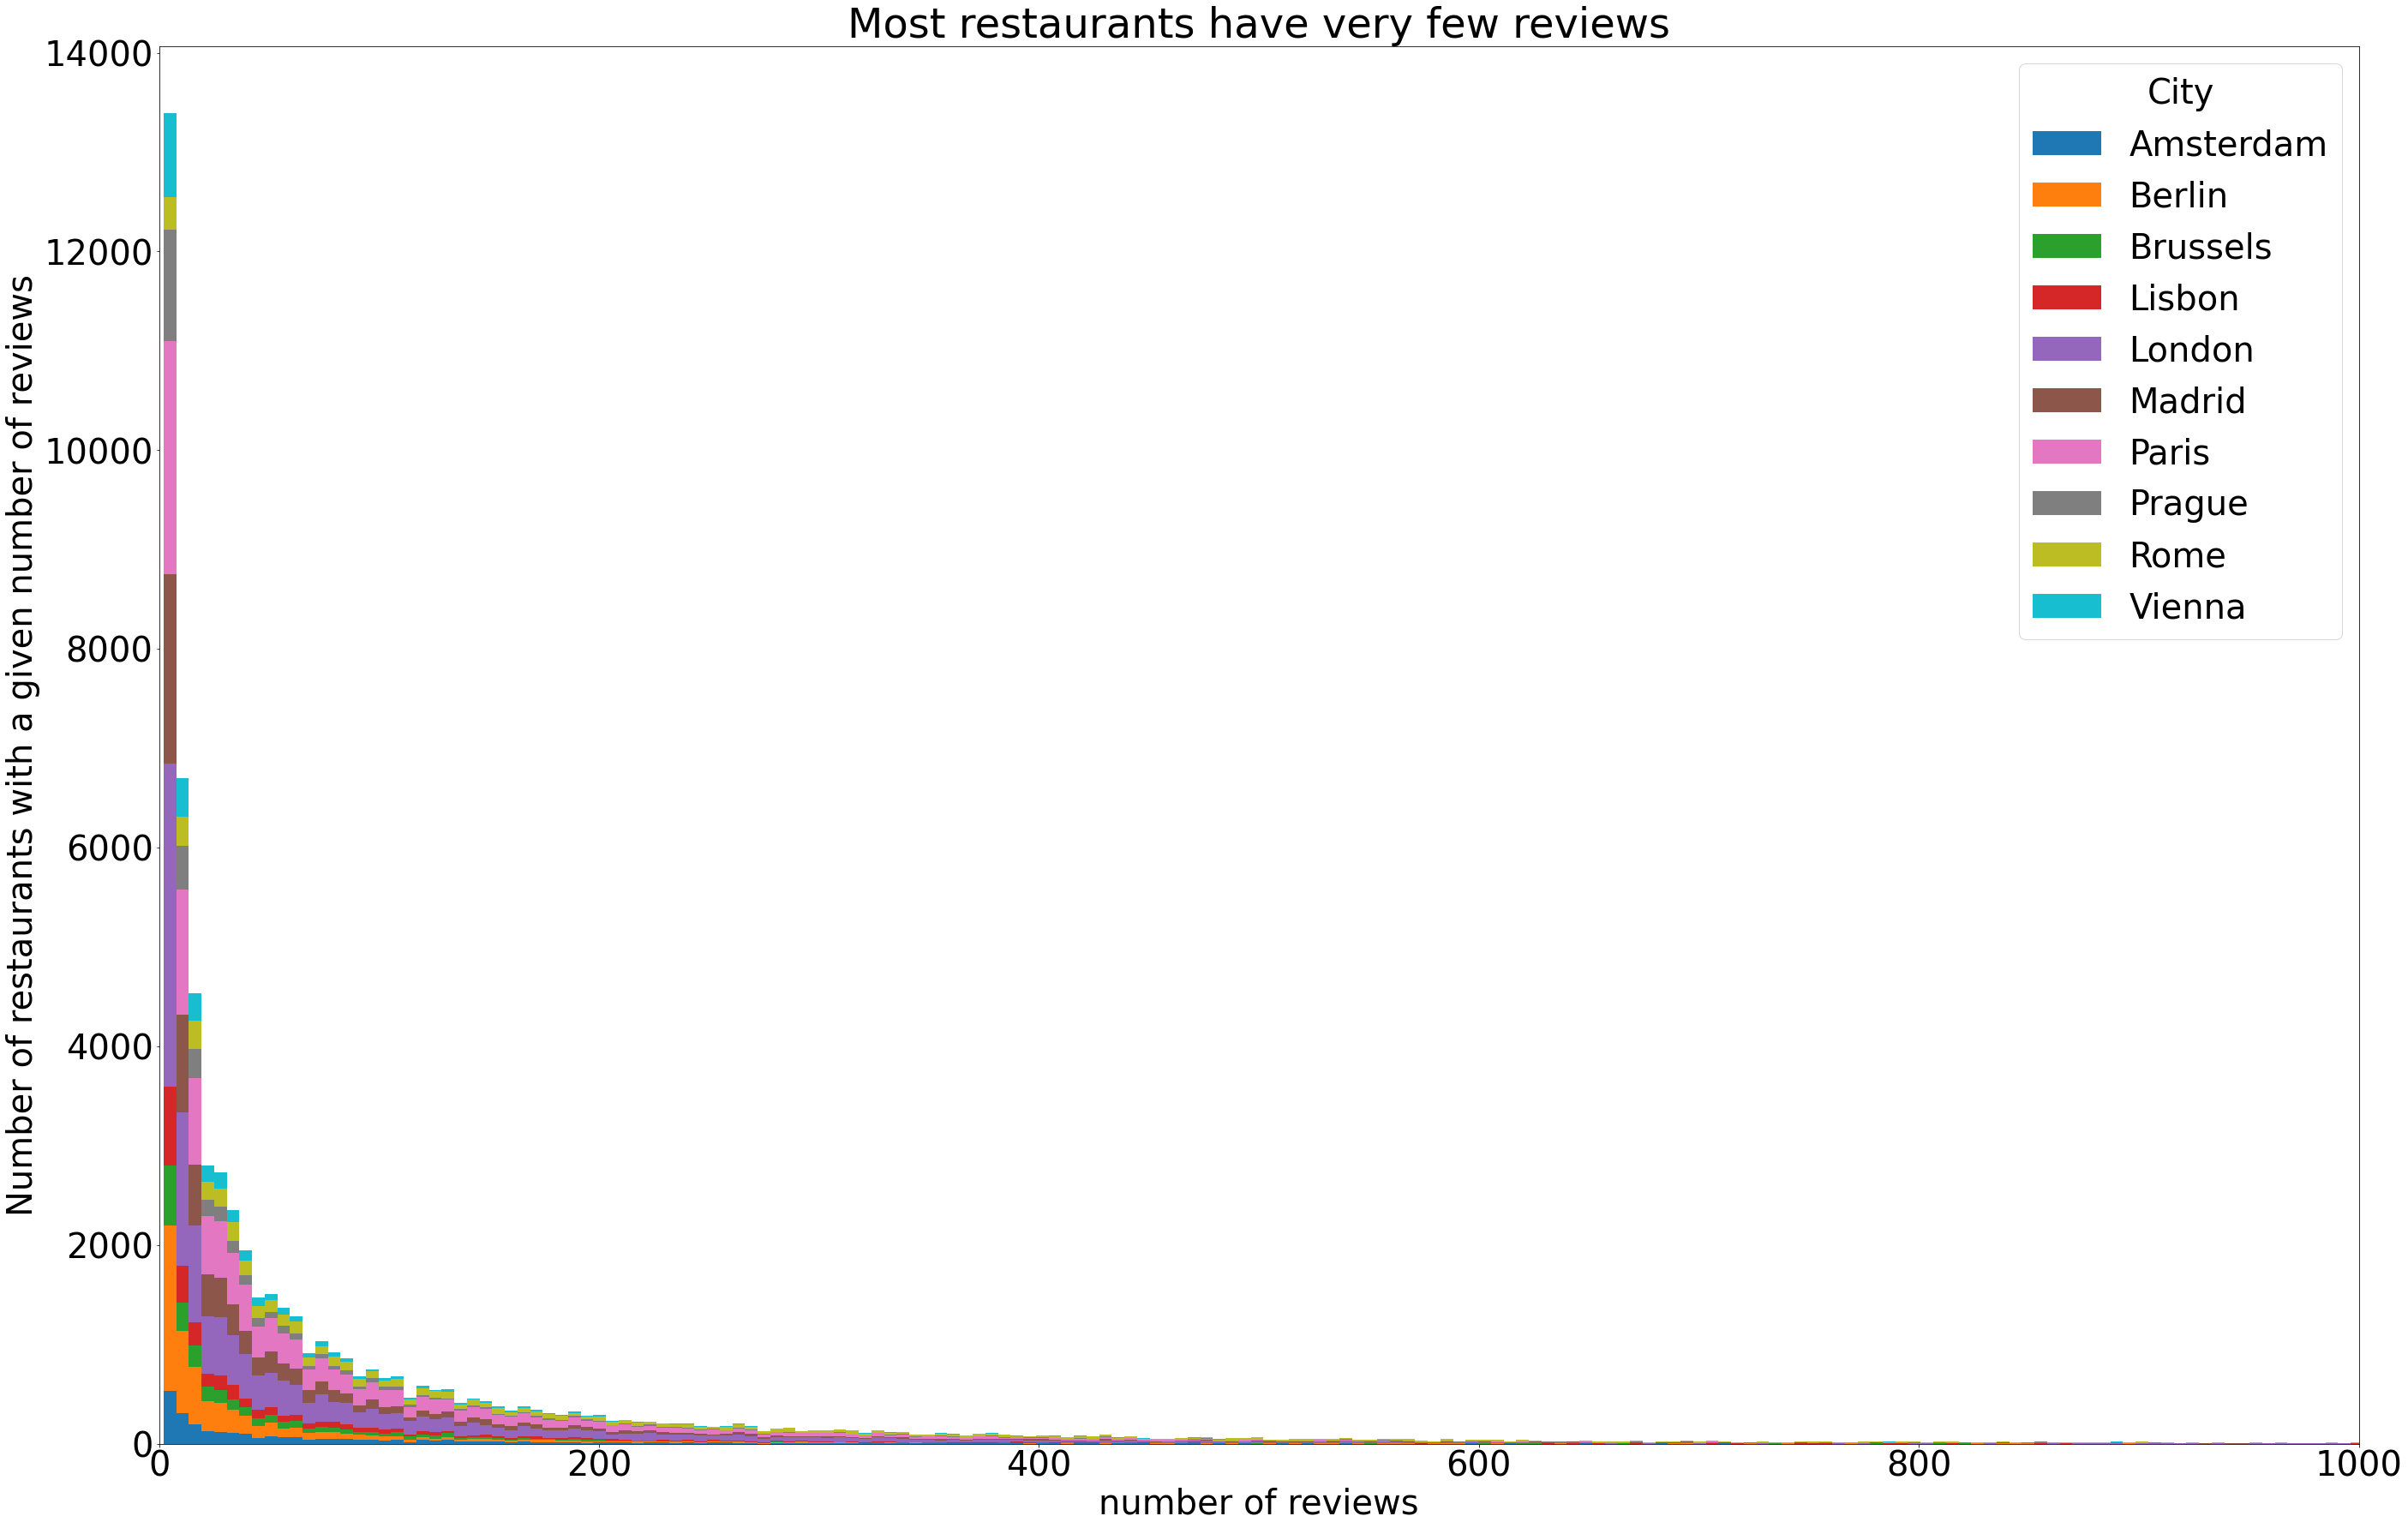

In [ ]:
numbers_dist_per_town.plot(kind="hist", bins=2000, stacked=True, figsize=(46,30))
plt.ylabel("Number of restaurants with a given number of reviews");
plt.xlim(0,1000);
plt.title("Most restaurants have very few reviews");
plt.xlabel("number of reviews")

### Our working hypothesis is now that the rating of restaurants with a small number of reviews, is inflated
We are creating a new variable - this time boolean: has very few reviews  
We will then need to compare the ratings distribution across one categorical variable - the city - and a boolean variable whether it has few reviews or not

### A good way to compare distributions when we have a boolean variable in the mix is using side by side violin plots!

In [ ]:
# first we get the relevant variables from the original dataset, using copy - as we will change the dataset
df_number_reviews = df[["City", "Number of Reviews", "Rating"]].copy() 
# we then drop all the na values
df_number_reviews.dropna(inplace=True)
# convert again all ratings to floats
df_number_reviews["Rating"]=df_number_reviews["Rating"].astype("float")
df_number_reviews["few_reviews"] = df_number_reviews["Number of Reviews"] < 20

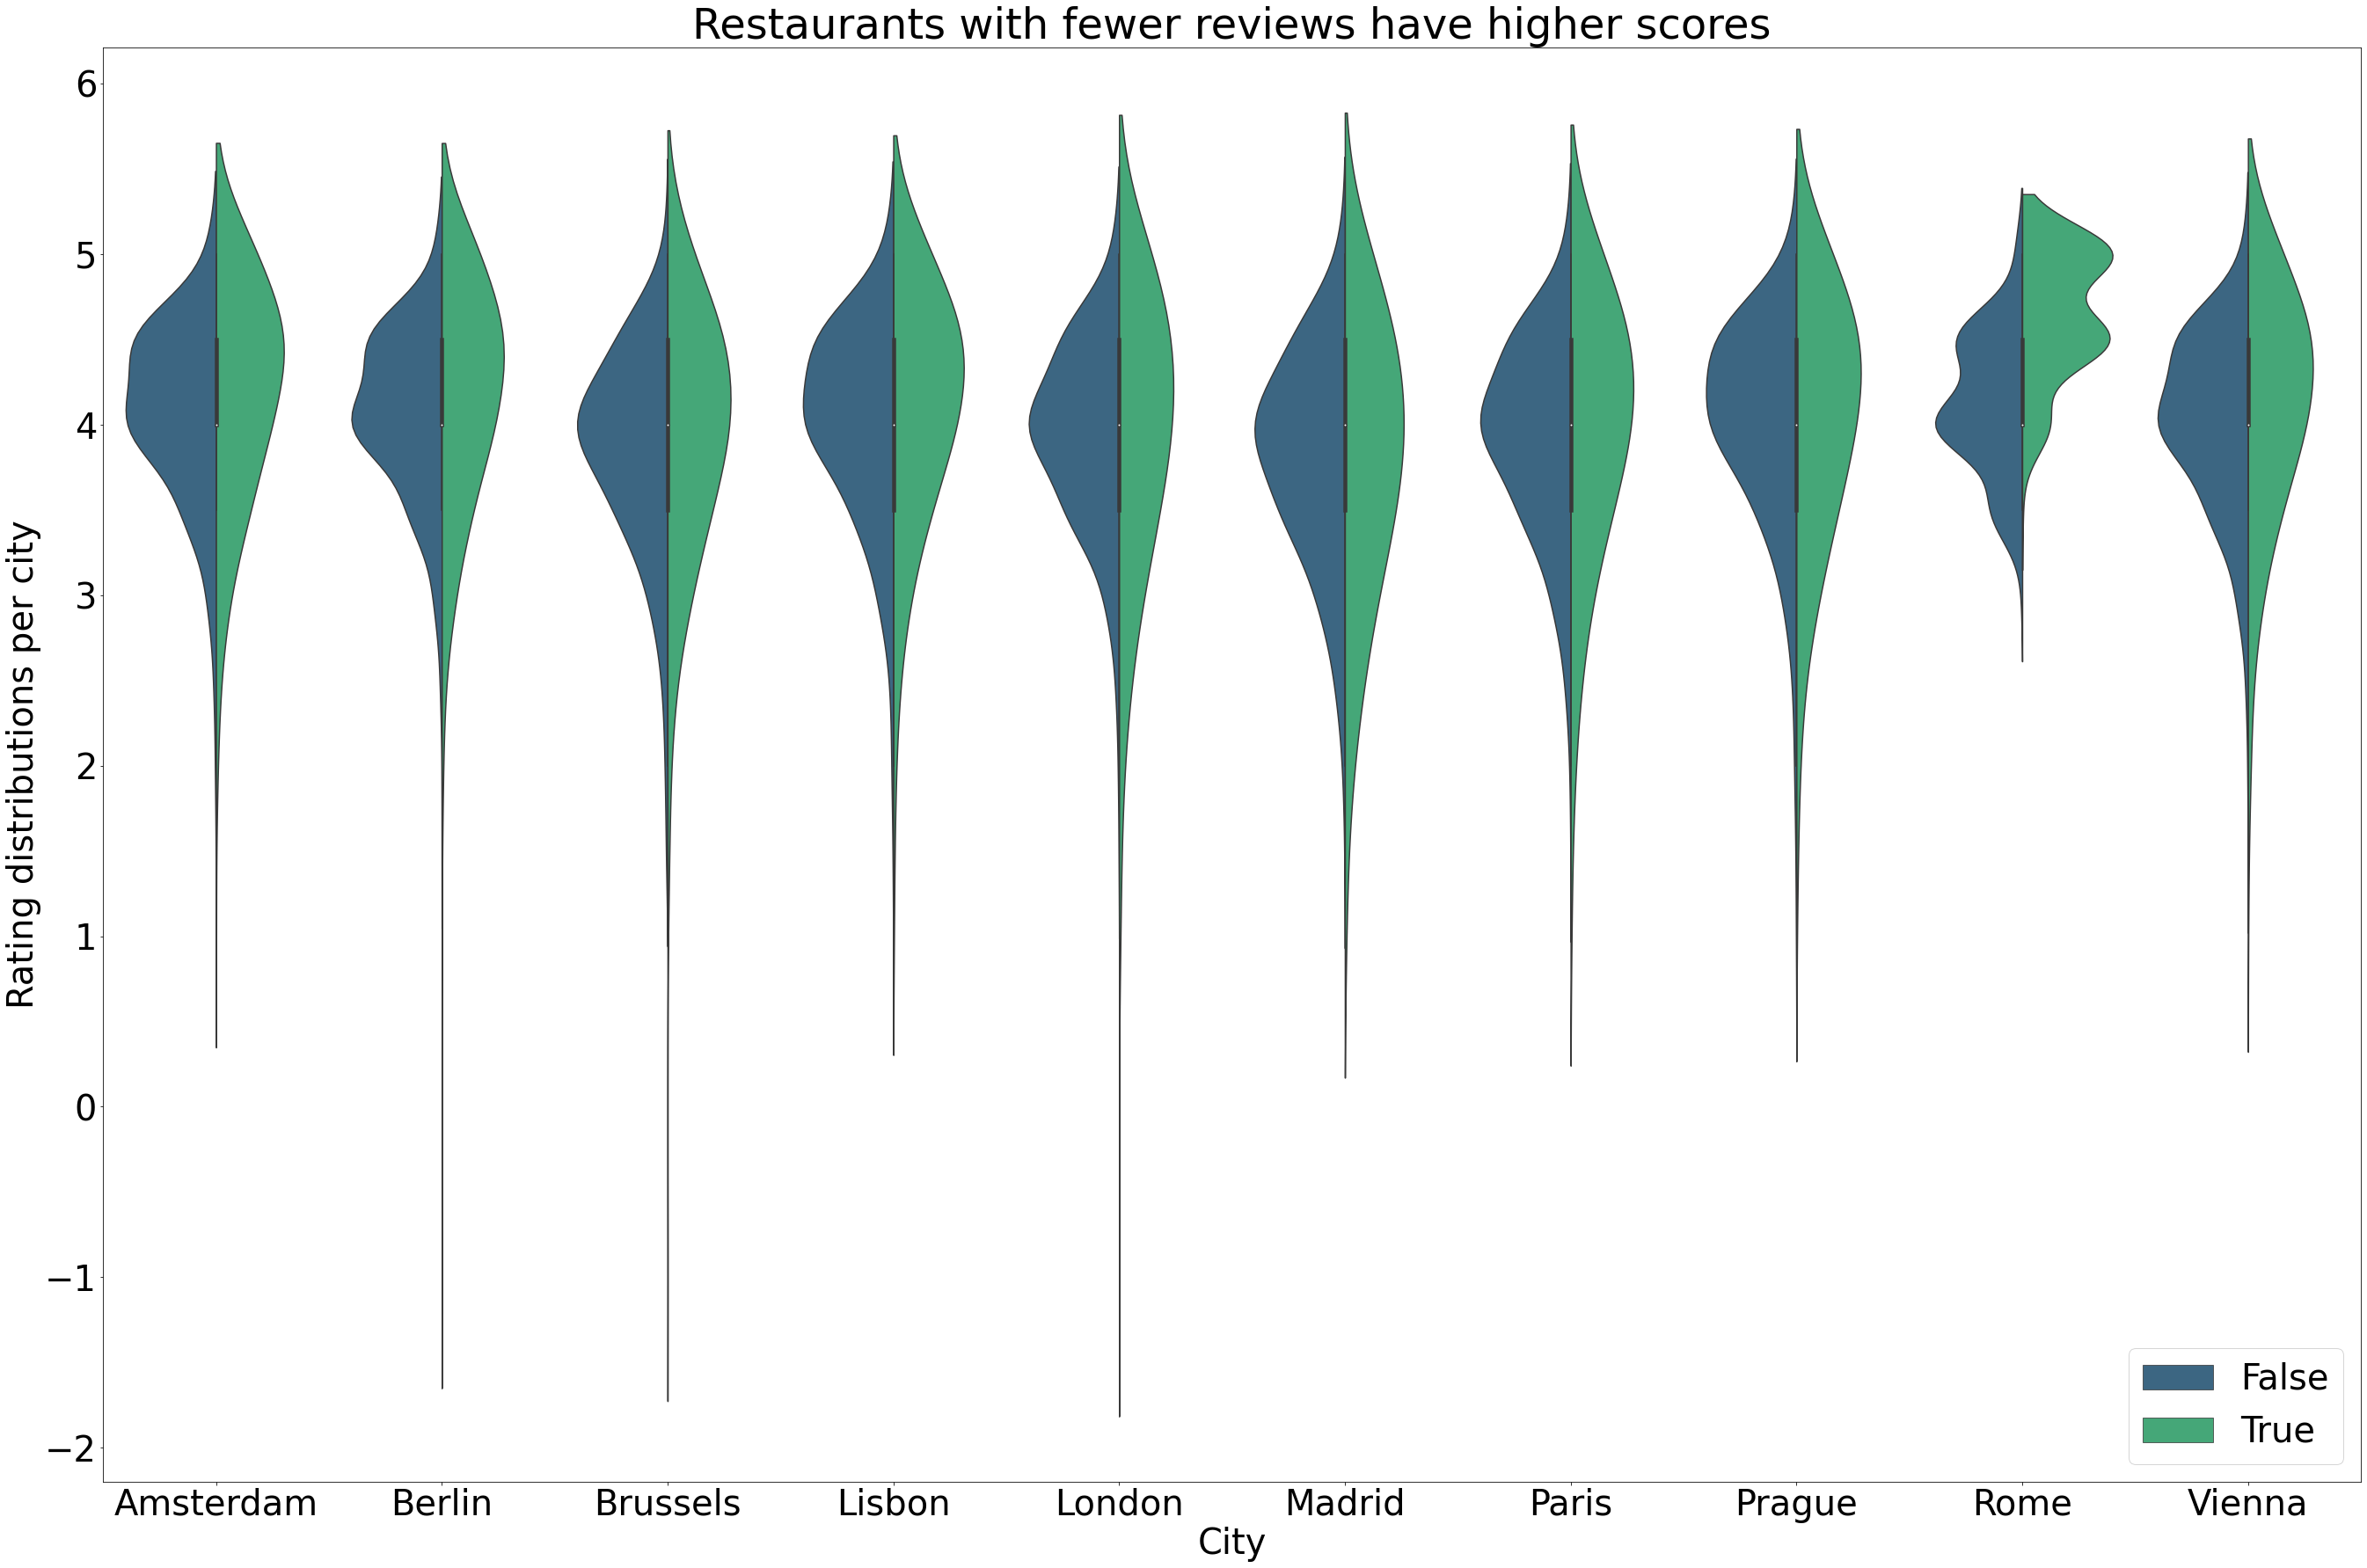

In [ ]:
# we now use seaborn to plot violins, 
# the sintax is: x is the column name with the categorical variables
#                y is the variable whose distribution we want to display
#                hue is the binary variable that we use to contrast the two distributions
#                data is the dataset
#                palette is the set of colors
#                plot indicates that we will have splited violins, one half for each distribution
#                bw is the window size used for computing the kernel
fig,ax = plt.subplots(figsize=(46,30))
sns.violinplot(x="City", y="Rating", hue="few_reviews",
                    data=df_number_reviews, palette="viridis", split=True, bw=0.5, ax=ax)
plt.ylabel("Rating distributions per city")
plt.legend(loc="lower right")
plt.title("Restaurants with fewer reviews have higher scores");

In [ ]:
df_number_reviews["Number of Reviews"]=df_number_reviews["Number of Reviews"].astype("float")

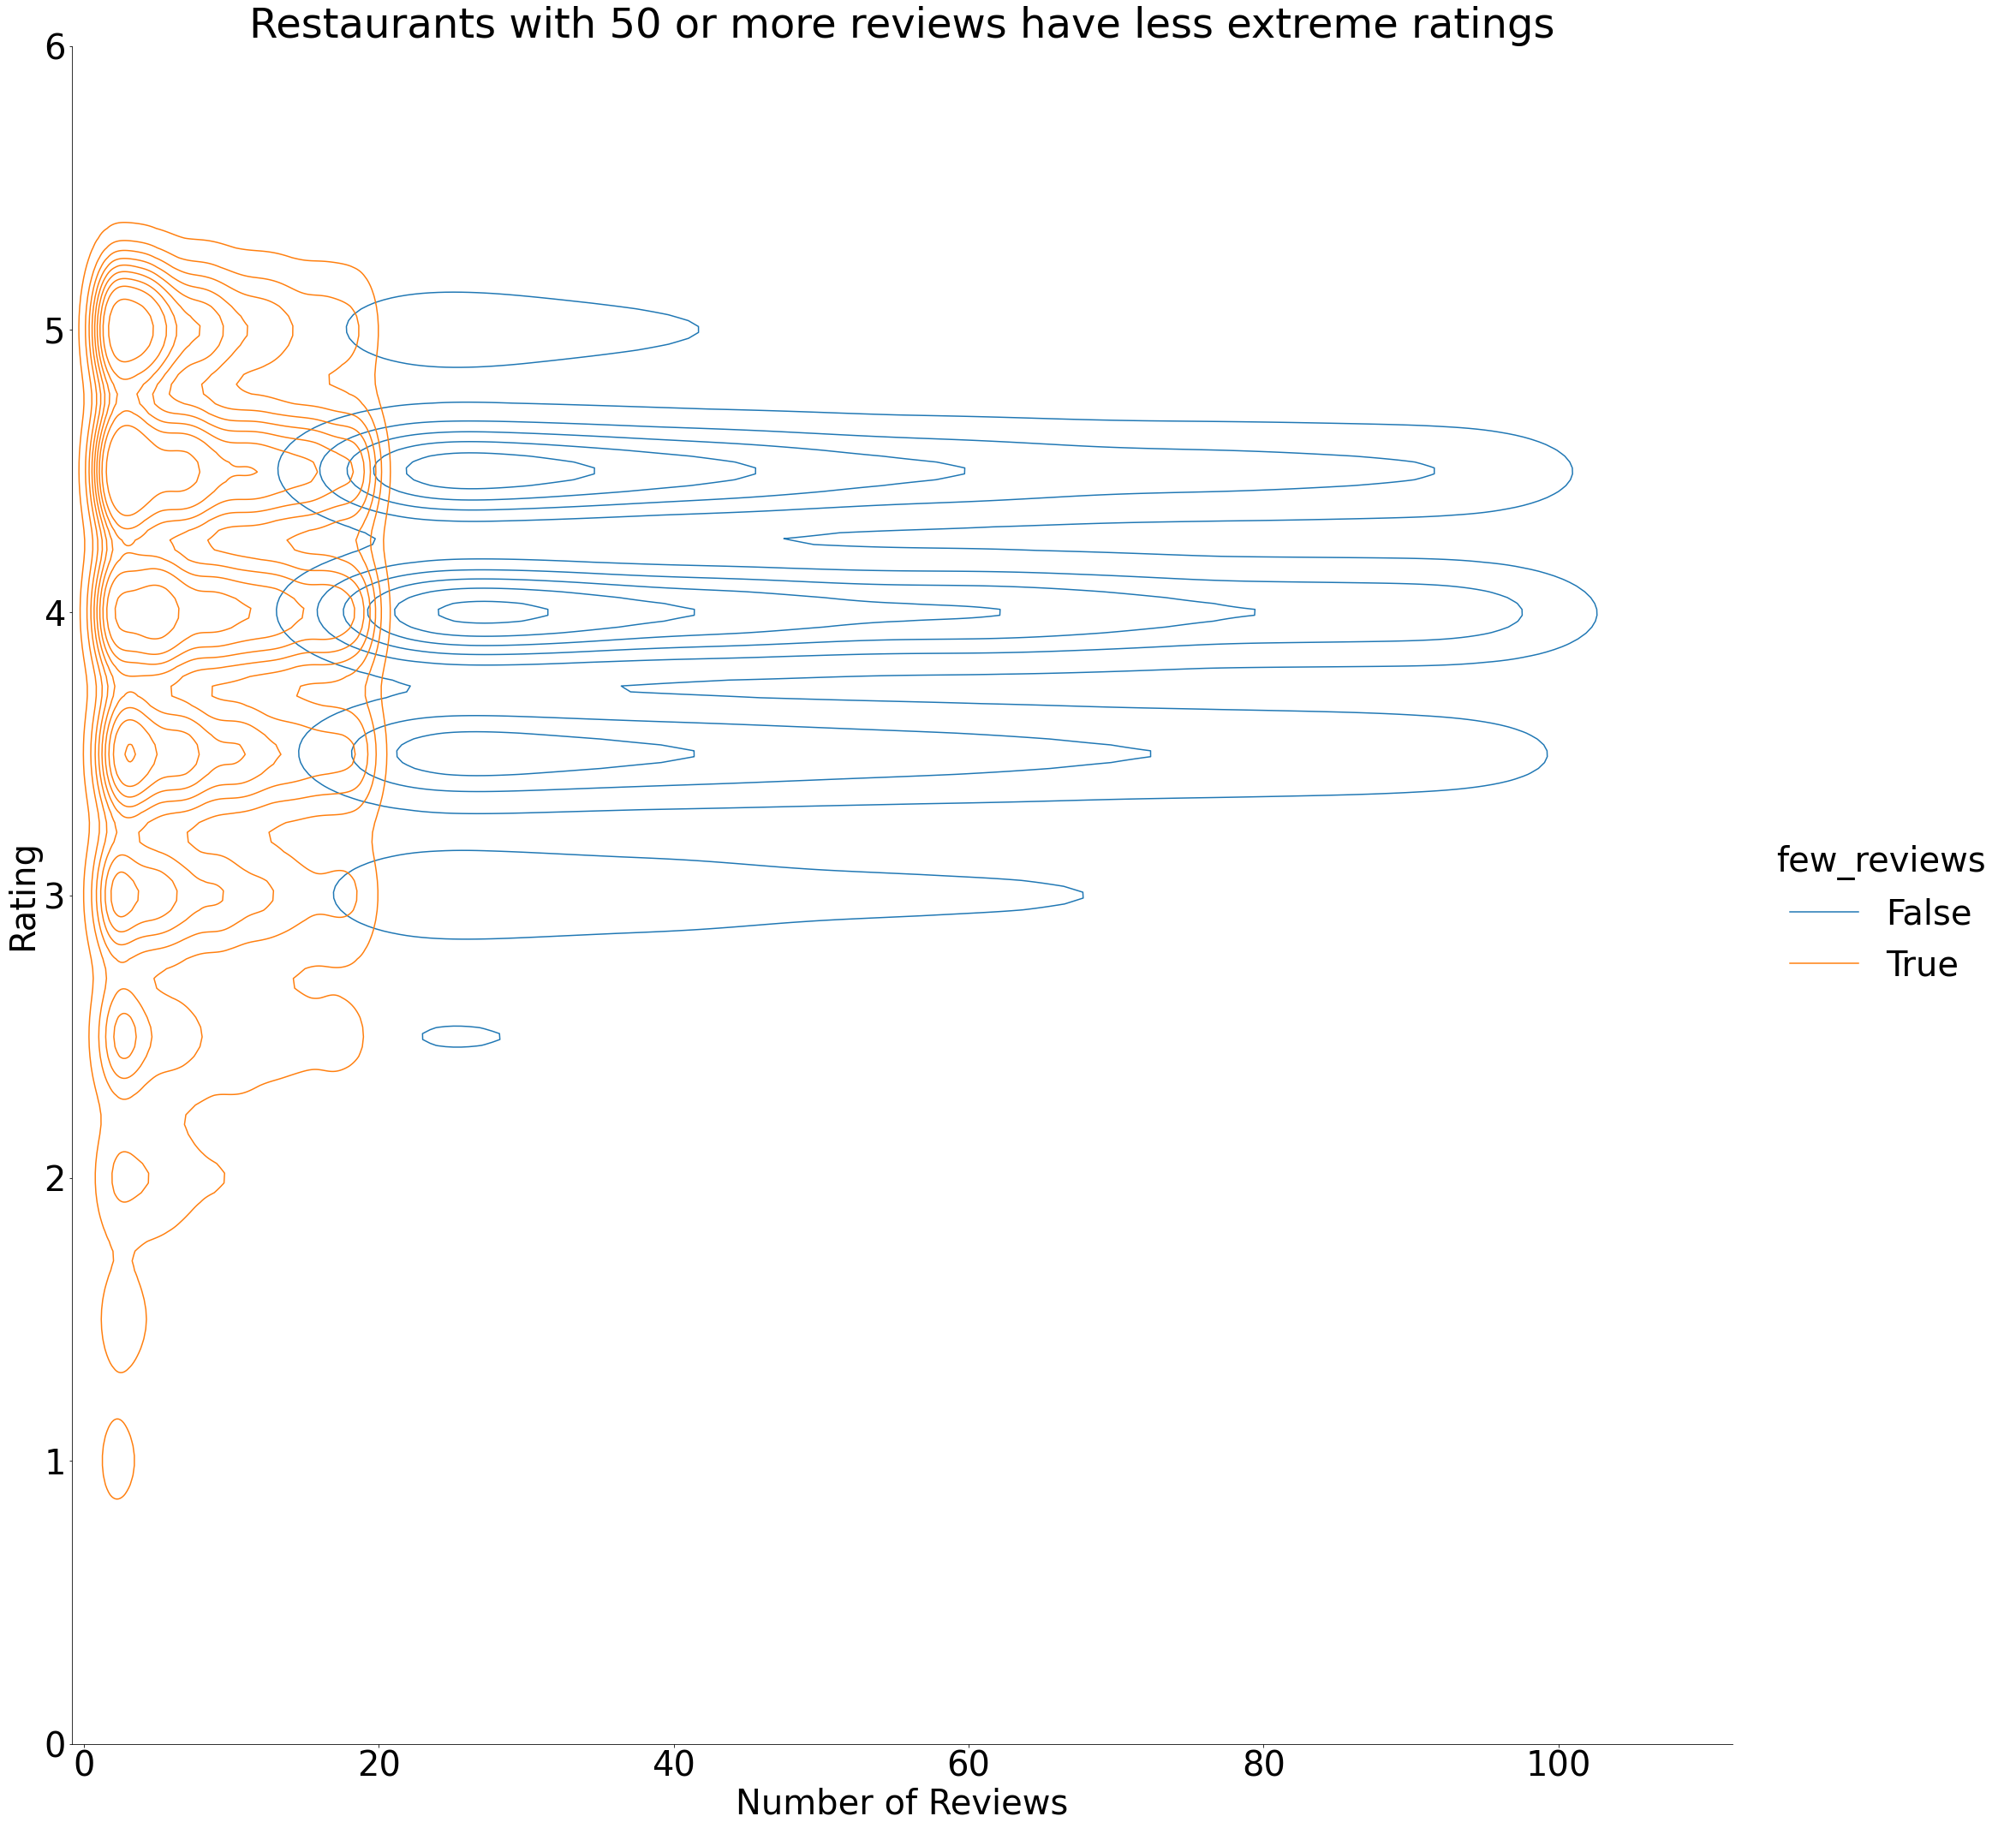

In [ ]:
fg = sns.displot(df_number_reviews[df_number_reviews["Number of Reviews"]<100], x="Number of Reviews", 
            y="Rating", hue="few_reviews", kind="kde", height=30
           );
# we cannot set the title directly as an argument to displot-> we must use the output from the plot function and 
# use the set function to pass arguments to axis
fg.set(**{"title":"Restaurants with 50 or more reviews have less extreme ratings",
          "ylim":(0,6)
         });

### Relevant aspects in the above representations
Violin plots are good for the visualization of multimodal data, i.e., data that has more than 1 local maxima or minima. They are especially useful in the direct comparison of distributions of  
1 - the same **numerical variable**, accross:  
2 - a **boolean** and a   
3 - a **categorical** variables.  

2D kernel density estimator plots, as 1d kdes and violin plots, are a non-parametric method to estimate and represent densities
-- In particular the estimated probability density function is represented by level curves and countour plots:
    
-- Lines connect points with the same density.   
-- All lines must close  
-- Points inside the lines have higher density than the points outside the curve  
-- As the densities used to represent the curves are equally spaced - regions with a higher number of curves have steeper changes in height  


# Visualization of multivariate numerical elements

When we are studying a problem that depends on a large number of variables, e.g., when we are trying to understand what drives a client to leave a bank, we:  
-- First, check the distribution of the variables to find outliers and interesting distributions  
-- Then, check how the variables depend on each other, using pairwise comparison  
-- Finally, if we still have time in the project, we can use dimensionality reduction techniques to take a glimpse of the distribution of the full set of variables as a whole.  

We will use here a balanced dataset, which was made available by Santander in a Kaggle competition.  
-- A balanced dataset is when we force the sampling over some variables to have a predefined distribution to factor out hidden correlations in the data  
-- In this dataset, the balance is made mostly across income, tenure, and interaction with the bank.  

# Summary:  
### In this lesson, in terms of data visualization concepts:
- **We address the problem of visualizing the interdependencies of two numerical variables** 
    1. Use of hexbins  
    2. Use of correlation matrices  
- **We address the problem of choosing a colormap**   
    1. Trends in color representations  
    
### In this lesson, in terms of programming concepts:
- **We compute correlation matrices**
- **We use default matplotlib methods represent hexbins**

## 1 - Import and check variable distributions to find outliers

In [ ]:
df = pd.read_csv("churn.csv")
relevant_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard"]

In [ ]:
df[relevant_columns].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard
0,619,42,2,0.00,1,1
1,608,41,1,83807.86,1,0
2,502,42,8,159660.80,3,1
3,699,39,1,0.00,2,0
4,850,43,2,125510.82,1,1


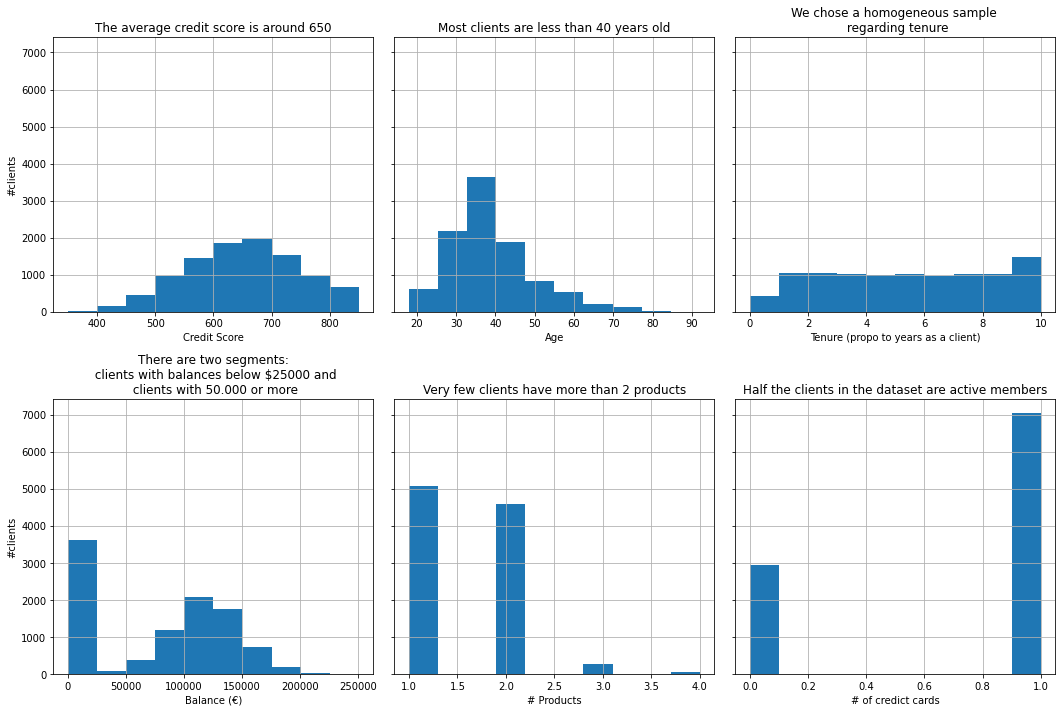

In [ ]:
#select the relevant columns
df_rev = df[relevant_columns]
# initialize figure and subplots so that we have two rows with 3 columns of plots
#note that we are using the same y scale for all plots
fig,ax = plt.subplots(2,3,sharey=True, figsize = (15,10))

#plot histograms directly into the subplots
df_rev.hist(ax=ax);

#lable the y-axis labels -> one per row
ax[0][0].set_ylabel("#clients")
ax[1][0].set_ylabel("#clients")

#lable the x-axis and add a title for each histogram
ax[0][0].set_xlabel("Credit Score")
ax[0][0].set_title("The average credit score is around 650")

ax[0][1].set_title("Most clients are less than 40 years old")
ax[0][1].set_xlabel("Age")

ax[0][2].set_title("We chose a homogeneous sample \n regarding tenure")
ax[0][2].set_xlabel("Tenure (propo to years as a client)")

ax[1][0].set_title("There are two segments:\n clients with balances below \$25000 and\n clients with 50.000 or more")
ax[1][0].set_xlabel("Balance (€)")

ax[1][1].set_title("Very few clients have more than 2 products")
ax[1][1].set_xlabel("# Products")

ax[1][2].set_title("Half the clients in the dataset are active members")
ax[1][2].set_xlabel("# of credict cards")

# fix possible overlap between text using tight layout
fig.set_tight_layout(True)

### Important ### Notes on programming: pandas basics

-- Use of fig.set_tight_layout(True) to ensure that there is no overlap between text in different plotsaspects of this representation:
-- All plots have labels, units, and a title  
-- All plots share the same y-axis, making the comparison easy  

### Notes on programming: pandas basics
-- Use of fig.set_tight_layout(True) to ensure that there is no overlap between text in different plots

### Try it yourself
-- Repeat the above example but use the columns:  
**rel_ex_2 = ["IsActiveMember","EstimatedSalary","Exited"]**

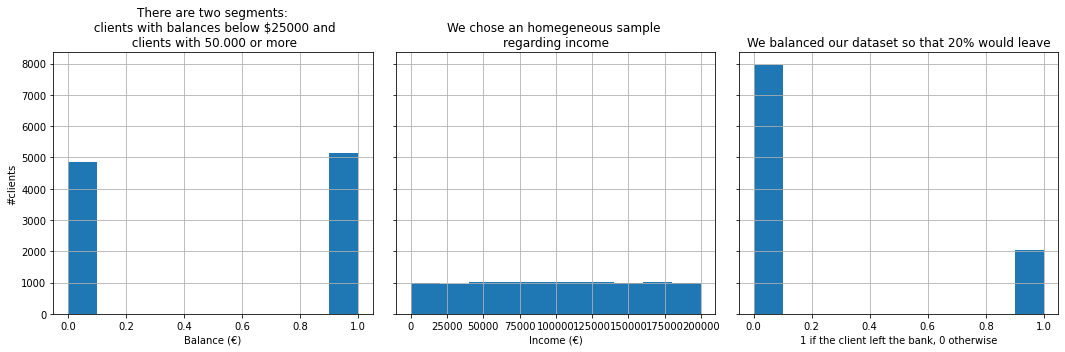

In [ ]:
# select the subset of columns
rel_ex_2 = ["IsActiveMember","EstimatedSalary","Exited"]
selected_df = df[rel_ex_2]

# create figure and subplots (1 row three columns)
fig,ax = plt.subplots(1,3,sharey=True, figsize = (15,5))

# plot the histograms for the remaining figures
selected_df.hist(ax=ax);

# add labels, units and title for each plot
ax[0].set_ylabel("#clients")
ax[0].set_title("There are two segments:\n clients with balances below \$25000 and\n clients with 50.000 or more")
ax[0].set_xlabel("Balance (€)")
ax[1].set_title("We chose an homegeneous sample \nregarding income")
ax[1].set_xlabel("Income (€)")
ax[2].set_title("We balanced our dataset so that 20% would leave")
ax[2].set_xlabel("1 if the client left the bank, 0 otherwise");

# fix possible overlap between text using tight layout
fig.set_tight_layout(True)

# 2 -Then, we do a pairwise comparison across variables:
-- First by plotting xy plots,  
-- Then by plotting hexbins, highlighting distributions over subsets of data  
-- Then by analyzing if the variables have a strong correlation using heatmaps

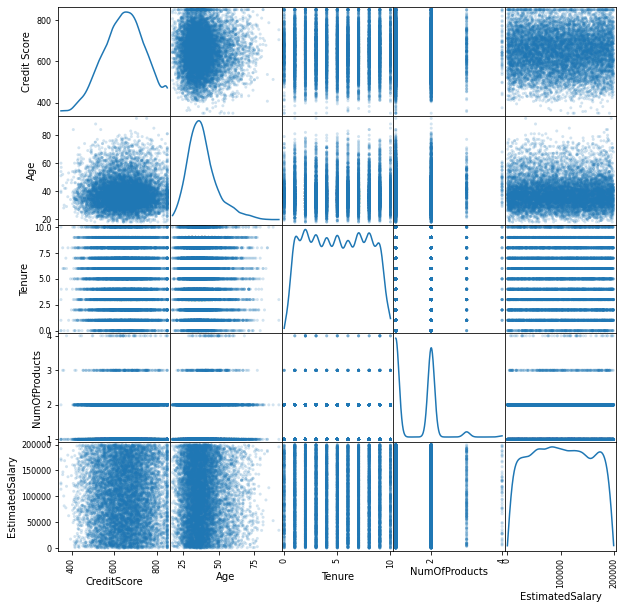

In [ ]:
#use the scatter_matrix from plotting to create the scatter plot and setting an alpha value
sm = pd.plotting.scatter_matrix(df[["CreditScore","Age","Tenure","NumOfProducts", "EstimatedSalary"]], alpha=0.2, figsize=(10, 10), diagonal='kde');
# set labels: first initialize a vector with all the strings
label = ["Credit Score", "Age", "Tenure", "# Products", "Income (€)"]
n_elem = len(label)
# set the matrix of subplots as a vector using reshape(-1)
sv = sm.reshape(-1)
# use list comprehension to iterate over the list with labels and the matrix with subplots
[sv[i].xaxis.label.set_text(label[i]) for i in range(n_elem)];
[sv[i].yaxis.label.set_text(label[i]) for i in range(n_elem)];


### Important aspects of this representation  
- It allows a quick glance over all features and their pairwise relations   
    1. It represents the distribution of the variables themselves in the diagonal (or at least a kde version!)  
    2. It helps you get a clear grasp of how variables depend on each other,   
    3. But it says nothing on how three or more than one of the variables
- To achieve a sense of "density" - we introduced an alpha parameter in the plot  
    1. Alpha parameters define transparency: alpha = 1 opaque, alpha = 0 occluded
    2. When superimposed the dots become darker -> darker regions have a higher density
- Labels will never be correct for the diagonal... 

### Notes on programming:
- To format individual plots in the matrix, you must use the output of the function:
    1. the pandas function **scatter_matrix** returns a set of instances of axis class
    2. you can change labels, and ticks using its output
- You can transform a matrix into a vector using reshape(-1)
    1. **sm = sm.reshape(-1)** -> the output of scatter_matrix is an N times N structure. We here transformed it into a vector, so that we could iterate through it

### Try it yourself
1 - use the  "Balance", "CreditScore", "Exited" and Age, but with different alpha values

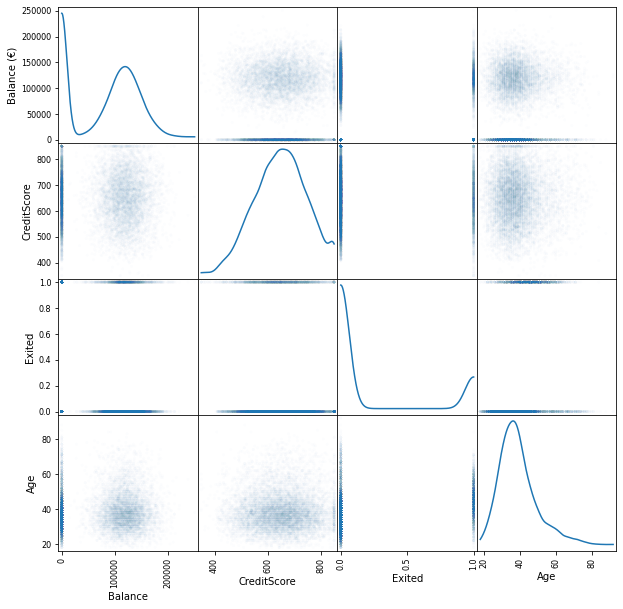

In [ ]:
#use the scatter_matrix from plotting to create the scatter plot and setting an alpha value
sm = pd.plotting.scatter_matrix(df[["Balance", "CreditScore","Exited", "Age"]], alpha=0.01, figsize=(10, 10), diagonal='kde');
label = ["Balance (€)","Credit Score", "Left", "Age"]
# set labels: first initialize a vector with all the strings
n_elem = len(label)
# set the matrix of subplots as a vector using reshape(-1)
sm = sm.reshape(-1)
# use list comprehension to iterate over the list with labels and the matrix with subplots
[sm[i].xaxis.label.set_text(label[i]) for i in range(n_elem)];
[sm[i].yaxis.label.set_text(label[i]) for i in range(n_elem)];

#### Densities are more easily perceived in hexagonal plots
- Hexagonal plots have the same problem as histograms -> we need to define the size of each bin!
- In Hexagonal plots, the gridsize defines the discretization

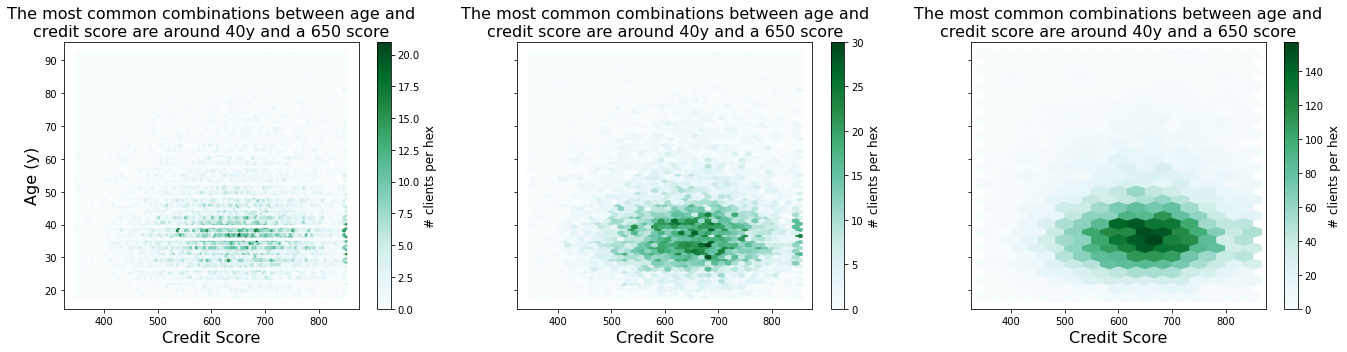

In [ ]:
# initialize figure and subplots -> sharing the same y axis
fig, ax = plt.subplots(1,3, sharey=True)
# each subplot has a different number of bins
hb_1 = df.plot.hexbin(x="CreditScore", y="Age", figsize=(19, 5), ax=ax[0]);
hb_2 = df.plot.hexbin(x="CreditScore", y="Age", figsize=(19, 5), gridsize=(40,40), ax=ax[1]);
hb_3 = df.plot.hexbin(x="CreditScore", y="Age", figsize=(19, 5), gridsize=(15,15), ax=ax[2]);

# set labels and titles using list comprehension:
[ax_e.set_ylabel("Age (y)", fontsize=16) for ax_e in ax]
[ax_e.set_title("The most common combinations between age and\ncredit score are around 40y and a 650 score" , fontsize=16)for ax_e in ax];
[ax_e.set_xlabel("Credit Score", fontsize=16) for ax_e in ax];
#fix collisions
fig.set_tight_layout(True)
# add the color bar -> maps numerical values to colors
[hb.collections[0].colorbar.set_label("# clients per hex", fontsize=12) for hb in [hb_1, hb_2, hb_3]];

### Besides densities, we can represent other functions using color
- use the argument: reduce_C_function
- set it to some function that receives a sequence (NumPy array/list) as an argument and returns an integer
- Examples: np.mean, np.sum, np.median,...
- Note that we are not adding the parenthesis.

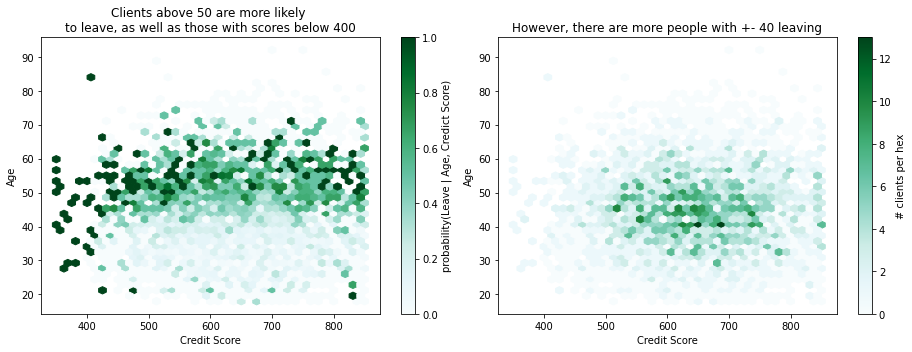

In [ ]:
fig, ax = plt.subplots(1,2)
# represent the probability of a client with a given age and credit score churning 
# -- corresponds to the expected value (estimated with the sample mean) of exiting 
hb_1 = df.plot.hexbin(x="CreditScore", y="Age", C="Exited", reduce_C_function=np.mean, gridsize=40, figsize=(13, 5), ax=ax[0]);
# represent the total number of clients of a given age and credit score that exited the banck
hb_2 = df.plot.hexbin(x="CreditScore", y="Age", C="Exited", reduce_C_function=np.sum, gridsize=40,figsize=(13, 5), ax=ax[1]);

# set labels and titles
[ax_e.set_xlabel("Credit Score") for ax_e in (ax)]
[ax_e.set_ylabel("Age") for ax_e in (ax)]

ax[0].set_title("Clients above 50 are more likely \nto leave, as well as those with scores below 400")
ax[1].set_title("However, there are more people with +- 40 leaving")

# set color bars with the association of colors to numerical values
hb_1.collections[0].colorbar.set_label("probability(Leave | Age, Credict Score)");
hb_2.collections[0].colorbar.set_label("# clients per hex");
fig.set_tight_layout(True)

### Important aspects of this representation  
- It uses hexagons and not squares/rectangles: 
    https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/h-whyhexagons.htm
    1. Hexagons are the regular polygon that is most similar to a sphere and still tessellate the plane
    1.1. the similarity in this sense refers to the distance between boundary points are closer to the center of the polygon than in other **regular polygons with the same area**
    1.2. tessellating the plane means that we can cover the plane with hexagon tiles, leaving no space between tiles and with no superposition between tiles
    2. Being similar to a sphere:
        2.1. reduces sampling bias -
        2.2. helps in representing curves: the regularity of rectangles and the human tendency to create lines by continuity induces the perception of lines
- We can represent more than two variables!    
    1. We can use just the standard api, and end up with a 2D histogram, where color represents quantities
    2. We can assign another variable to color, and use a specific function to aggregate values in the respective bins


### Notes on programming:
- To format the colorbar, you must use the output of the function:
    1. the pandas function **df.plot.hexbin** returns an axis, you can access the different elements by using ax.collections. The first element in the collection is the plot and the plot as an attribute called colorbar

### Try it yourself
-- Try to find a relation between Income, Balance and leaving


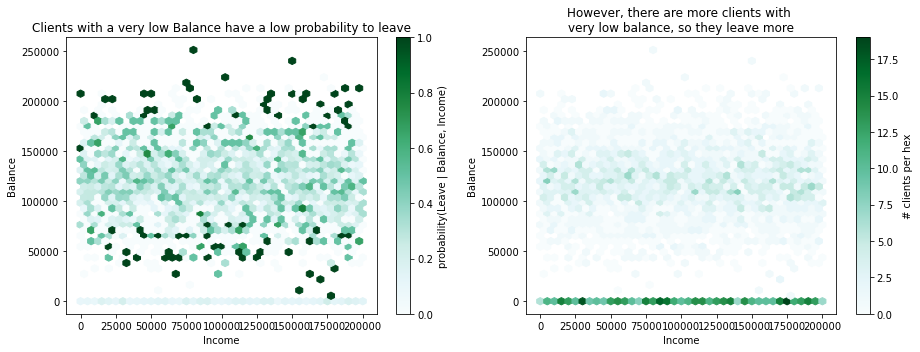

In [ ]:
# initialize figure and subplots
fig, ax = plt.subplots(1,2)

#set plot hexabins using NumPy mean and Numpy sum functions -> each plot in its ax[i], i=0,1
# do not forget to assign the output of df.plot.hexbin to a new object as we will need it to add the colorbar
hb_1 = df.plot.hexbin(x="EstimatedSalary", y="Balance", C="Exited", reduce_C_function=np.mean, gridsize=40, figsize=(13, 5), ax=ax[0]);
hb_2 = df.plot.hexbin(x="EstimatedSalary", y="Balance", C="Exited", reduce_C_function=np.sum, gridsize=40,figsize=(13, 5), ax=ax[1]);

# set labels  and titles using ax[i] and set_xlabel, set_ylabel, set_title
[ax_e.set_xlabel("Income") for ax_e in (ax)]
[ax_e.set_ylabel("Balance") for ax_e in (ax)]

ax[0].set_title("Clients with a very low Balance have a low probability to leave")
ax[1].set_title("However, there are more clients with \nvery low balance, so they leave more")

# add the color bar using the object returned by df.plot.hexbin
hb_1.collections[0].colorbar.set_label("probability(Leave | Balance, Income)");
hb_2.collections[0].colorbar.set_label("# clients per hex");
# fix collisions 
fig.set_tight_layout(True)

### We can also check the pairwise dependency using correlation matrices

In [ ]:
# correlation matrices are computed simply applying .corr() to a dataframe
corr_val = df[relevant_columns].corr()
corr_val

,HasCrCard,IsActiveMember,Age,EstimatedSalary,CreditScore,Tenure,NumOfProducts,Balance,Exited
HasCrCard,1.000000,-0.011866,-0.011721,-0.009933,-0.005458,0.022583,0.003183,-0.014858,-0.007138
IsActiveMember,-0.011866,1.000000,0.085472,-0.011421,0.025651,-0.028362,0.009612,-0.010084,-0.156128
Age,-0.011721,0.085472,1.000000,-0.007201,-0.003965,-0.009997,-0.030680,0.028308,0.285323
EstimatedSalary,-0.009933,-0.011421,-0.007201,1.000000,-0.001384,0.007784,0.014204,0.012797,0.012097
CreditScore,-0.005458,0.025651,-0.003965,-0.001384,1.000000,0.000842,0.012238,0.006268,-0.027094
Tenure,0.022583,-0.028362,-0.009997,0.007784,0.000842,1.000000,0.013444,-0.012254,-0.014001
NumOfProducts,0.003183,0.009612,-0.030680,0.014204,0.012238,0.013444,1.000000,-0.304180,-0.047820
Balance,-0.014858,-0.010084,0.028308,0.012797,0.006268,-0.012254,-0.304180,1.000000,0.118533
Exited,-0.007138,-0.156128,0.285323,0.012097,-0.027094,-0.014001,-0.047820,0.118533,1.000000


#### The correlation matrix can be represented using a heatmap -> converts numerical values to colors

Text(0.5, 1.0, 'Most variables are independent,\n but age and churn show some correlation')

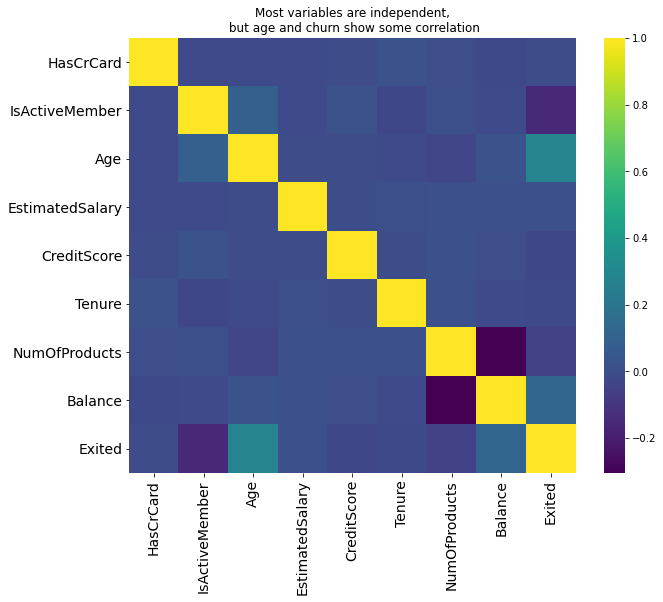

In [ ]:
# First, get a color map -> a function that converts numbers to colors
c_palette = sns.color_palette("viridis", as_cmap=True)
# then initialize the figure and subplots
fig,ax= plt.subplots(1,1,figsize=(10,8))
# use a heatmap with the correlation matrix, the colormap, and the axis
sns.heatmap(corr_val, cmap=c_palette, ax=ax)
# just fix the fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
# add title
plt.title("Most variables are independent,\n but age and churn show some correlation")

## A word on colors 

In the correlation plot above, we have defined explicitly the color map
c_palette = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corr_val, cmap=c_palette, ax=ax)

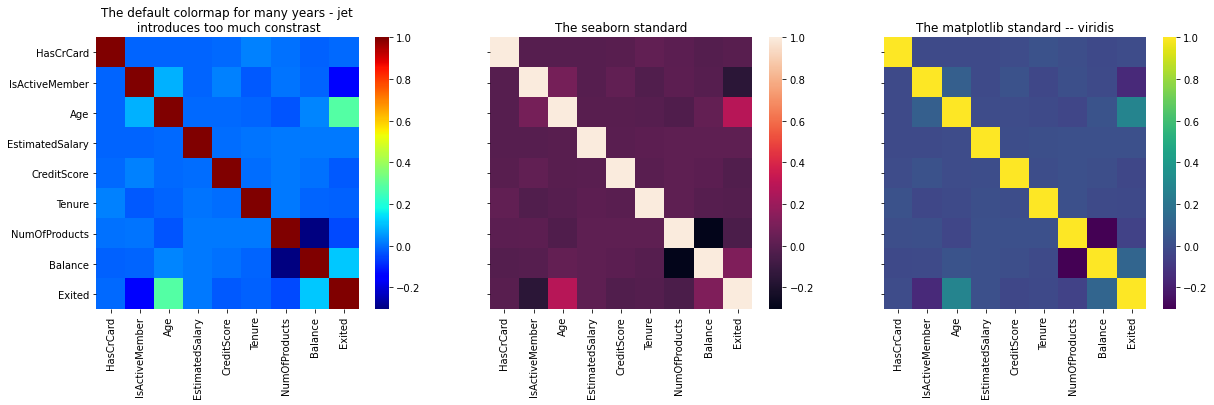

In [ ]:
fig,ax= plt.subplots(1,3,figsize=(20,5), sharey=True)
sns.heatmap(corr_val, ax=ax[0], cmap="jet")
ax[0].set_title("The default colormap for many years - jet\n introduces too much constrast")
sns.heatmap(corr_val, ax=ax[1])
ax[1].set_title("The seaborn standard")
sns.heatmap(corr_val, ax=ax[2], cmap="viridis")
ax[2].set_title("The matplotlib standard -- viridis");

## What is a colormap?

### Colormaps associate a number to a color



In the correlation example above, while the values that we are representing are exactly the same, by choosing different colormaps, we ended up with different representations.  
   
The choice of how to map numbers (or range of numbers) into colors affects how well are we able to:  
-- identify changes in the values by looking into the images  
-- print an image in black and white and still identify relevant features  
-- share images with colour blind people  
  

### Jet (close to rainbow color map) was the default for many years
-- But it is not perceptually uniform, it is not color blind friendly and is terrible when printed in black and white!

https://gorelik.net/2020/08/17/what-is-the-biggest-problem-of-the-jet-and-rainbow-color-maps-and-why-is-it-not-as-evil-as-i-thought/

Our capacity to identify changes in the values is a complex process:  
-- it depends on the cells in our eyes that act as color sensors;  
-- it depends on how our brain interprets the different responses from these cells.  
  
The objective when creating the colormaps is to provide a map where:  
-- the difference between two numbers we need to map is proportional to **our perception** of how different the two colors are.  
-- I.e., the color of two numbers that are close by (i.e., 1.1 and 1 in a scale from 0 to 100) must be perceptually closer than the color of two numbers that are far apart (e.g., 1 and 90 in a scale from 0 to 100).  

It is highly subjective, but there has been plenty of studies on how humans on average perceive color, and how to create color representations where we can have these properties.  
-- As far as I know, the current state of the art is the viridis colormap - which is opensource.  


In 2014 - 2015 both matlab and matplotlib changed their default color map to colormaps that would best fit the above criteria.  
-- they are mathematically sound!
-- lots of trouble to make them look pretty - and viridis was the king of all colormaps (viridis presentation and explanation in a python conference https://youtu.be/xAoljeRJ3lU )   
-- Viridis is perceptually uniform, is color blind friendly, has good contrast when you print in black and white **and has green**    

  


However, by forcing uniformity, we also lose contrast. And rainbow colormaps (jet is rainbow colormap) are back in fashion by the hand of Google's Turbo colormap.  

https://gorelik.net/2020/08/17/what-is-the-biggest-problem-of-the-jet-and-rainbow-color-maps-and-why-is-it-not-as-evil-as-i-thought/  

The idea is that Turbo recovers the detail that we were losing contrast in the background.  

## What I expect you to take away from all this
-- In heatmap representations, we are mapping numbers to colors, and this map is mostly arbitrary  
-- A good map should have some perceptual uniformity ensuring that we can highlight what is important in our data\!  
-- It should also ensure that we can print in black and white and still see the details and be friendly towards color blind  

# Before we move on, I need to talk about bubble plots (scatter plots) - Review lecture 2
- As we did in the hexagonal representations above, bubble plots represent three types of quantitative information:
    1. X
    1. Y
    1. circle area (has to be positive!)
- It is easy to distinguish large bubbles from small, but it is difficult to compare/sort
    - **Ensure that the quantity that goes to the circle area is discriminative**

### Example of a terrible plot

In [ ]:
import matplotlib.pyplot as plt
initial_total_range = df["CreditScore"].max() - df["CreditScore"].min()
max_size_after_scaling = 100.
min_size_after_scaling = 10
final_total_range = max_size_after_scaling - min_size_after_scaling
normalize_between_0_and_1 = (df["CreditScore"]-df["CreditScore"].min())/(initial_total_range)
df["CreditScore_normalized"] = min_size_after_scaling + final_total_range*normalize_between_0_and_1

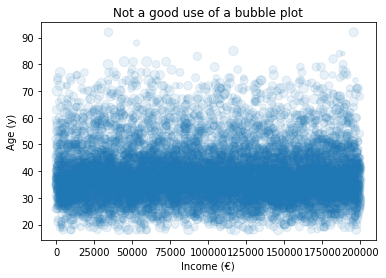

In [ ]:
plt.scatter("EstimatedSalary", "Age" ,s="CreditScore_normalized", data = df, alpha=0.1)
plt.xlabel("Income (€)")
plt.ylabel("Age (y)")
plt.title("Not a good use of a bubble plot");

### Take away on Bubble plots
When to use:  
    - When you have three levels of information to share  
    - When you do not have that many points to represent  
    - Remember that information on area is less easy to understand and compare than information on   position, or even color.